<a href="https://colab.research.google.com/github/VCnavi/UFES/blob/main/Modelo_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa de pré processamento (realizada em R)

### Nessa etapa, realizou-se um pré processamento manual dos dados, com o intuito de padronizar algumas inconsistências e filtrar as informações necessárias. A ideia principal foi corrigir erros de colunas repetidas (FLAG_STATUS...14 e FLAG_STATUS...23) e idênticas em seus valores; verificar rubricas repetidas, porém com inconsistências de escrita, e corrigí-las; selecionar as linhas da cidade de São Paulo; selecionar as linhas de pessoas categorizadas como "Indiciado", com o intuito de trabalhar apenas com os perfis de suspeitos e investigados. Os dados então foram agrupados em um único banco de dados.

In [ ]:
library(readr)
library(tidyverse)
library(fs)

#BO_2007_1
{
BO_2007_1 <- read_csv("BO_2007_1.csv", col_select = -'FLAG_STATUS...23') %>%
  rename(FLAG_STATUS = 'FLAG_STATUS...14')

BO_2007_1 <- BO_2007_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                         "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                         "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                         "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

table_CIDADE <- BO_2007_1 %>%
  count(CIDADE, sort = TRUE)

table_RUBRICA <- BO_2007_1 %>%
  count(RUBRICA, sort = TRUE)

BO_2007_1$RUBRICA[BO_2007_1$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"

lista_de_rubricas <- table_RUBRICA %>%
  slice(8, 12, 13, 16, 20, 21, 23) %>%
  pull(RUBRICA)

BO_2007_1 <- BO_2007_1 %>%
  filter(
    DESCR_TIPO_PESSOA == "Indiciado" &
      CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
      RUBRICA %in% lista_de_rubricas
  )

BO_2007_1_limpo <- BO_2007_1 %>%
  group_by(ANO) %>%
  arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
  mutate(
    ID_CRIME = paste0(ANO, "-1-", row_number())
  ) %>%
  ungroup() %>%

  # PASSO FINAL: Remova as colunas que não são mais necessárias
  select(-ANO, -ID_DELEGACIA, -NUM_BO)

write.csv(BO_2007_1_limpo, file = "BO_2007_1_limpo.csv")
}

#BO_2007_2
{
  BO_2007_2 <- read_csv("BO_2007_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2007_2 <- BO_2007_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2007_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2007_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2007_2$RUBRICA[BO_2007_2$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 12, 13, 16, 20, 22, 23) %>%
    pull(RUBRICA)

  BO_2007_2 <- BO_2007_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )
  BO_2007_2_limpo <- BO_2007_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2007_2_limpo, file = "BO_2007_2_limpo.csv")
}

#BO_2008_1
{
  BO_2008_1 <- read_csv("BO_2008_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2008_1 <- BO_2008_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2008_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2008_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2008_1$RUBRICA[BO_2008_1$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 12, 13, 14, 20, 22, 23) %>%
    pull(RUBRICA)

  BO_2008_1 <- BO_2008_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )
  BO_2008_1_limpo <- BO_2008_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2008_1_limpo, file = "BO_2008_1_limpo.csv")
}

#BO_2008_2
{
  BO_2008_2 <- read_csv("BO_2008_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2008_2 <- BO_2008_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2008_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2008_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2008_2$RUBRICA[BO_2008_2$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 12, 13, 15, 18, 19, 23) %>%
    pull(RUBRICA)

  BO_2008_2 <- BO_2008_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )
  BO_2008_2_limpo <- BO_2008_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2008_2_limpo, file = "BO_2008_2_limpo.csv")
}

#BO_2009_1
{
  BO_2009_1 <- read_csv("BO_2009_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2009_1 <- BO_2009_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2009_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2009_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2009_1$RUBRICA[BO_2009_1$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2009_1$RUBRICA[BO_2009_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2009_1$RUBRICA[BO_2009_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2009_1$RUBRICA[BO_2009_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2009_1$RUBRICA[BO_2009_1$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 12, 13, 14, 17, 20, 21) %>%
    pull(RUBRICA)

  BO_2009_1 <- BO_2009_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )

  BO_2009_1_limpo <- BO_2009_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2009_1_limpo, file = "BO_2009_1_limpo.csv")
}

#BO_2009_2
{
  BO_2009_2 <- read_csv("BO_2009_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2009_2 <- BO_2009_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2009_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2009_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2009_2$RUBRICA[BO_2009_2$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2009_2$RUBRICA[BO_2009_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2009_2$RUBRICA[BO_2009_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2009_2$RUBRICA[BO_2009_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2009_2$RUBRICA[BO_2009_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 12, 14, 15, 19, 21) %>%
    pull(RUBRICA)

  BO_2009_2 <- BO_2009_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )

  BO_2009_2_limpo <- BO_2009_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2009_2_limpo, file = "BO_2009_2_limpo.csv")
}

#BO_2010_1
{
  BO_2010_1 <- read_csv("BO_2010_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2010_1 <- BO_2010_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2010_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2010_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 10, 13, 14, 18, 19) %>%
    pull(RUBRICA)

  BO_2010_1 <- BO_2010_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )
  BO_2010_1_limpo <- BO_2010_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2010_1_limpo, file = "BO_2010_1_limpo.csv")
}

#BO_2010_2
{
  BO_2010_2 <- read_csv("BO_2010_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2010_2 <- BO_2010_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2010_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2010_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 12, 13, 14, 19, 20) %>%
    pull(RUBRICA)

  BO_2010_2 <- BO_2010_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )

  BO_2010_2_limpo <- BO_2010_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2010_2_limpo, file = "BO_2010_2_limpo.csv")
}

#BO_2010_1
{
  BO_2010_1 <- read_csv("BO_2010_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2010_1 <- BO_2010_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2010_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2010_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2010_1$RUBRICA[BO_2010_1$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 10, 13, 14, 18, 19) %>%
    pull(RUBRICA)

  BO_2010_1 <- BO_2010_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )
  BO_2010_1_limpo <- BO_2010_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2010_1_limpo, file = "BO_2010_1_limpo.csv")
}

#BO_2010_2
{
  BO_2010_2 <- read_csv("BO_2010_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2010_2 <- BO_2010_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_CIDADE <- BO_2010_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2010_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == "Estupro (art. 213)"] <- "Estupro (art.213)"
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2010_2$RUBRICA[BO_2010_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 12, 13, 14, 19, 20) %>%
    pull(RUBRICA)

  BO_2010_2 <- BO_2010_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
        RUBRICA %in% lista_de_rubricas
    )

  BO_2010_2_limpo <- BO_2010_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2010_2_limpo, file = "BO_2010_2_limpo.csv")
}

#BO_2011_1
{
BO_2011_1 <- read_csv("BO_2011_1.csv", col_select = -'FLAG_STATUS...23') %>%
  rename(FLAG_STATUS = 'FLAG_STATUS...14')

BO_2011_1 <- BO_2011_1[c("NUM_BO","ID_DELEGACIA", "ANO","MES","FLAG_STATUS","RUBRICA",
                         "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                         "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                         "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

table_DESCR_PESSOA <- BO_2011_1 %>%
  count(DESCR_TIPO_PESSOA, sort = TRUE)

table_CIDADE <- BO_2011_1 %>%
  count(CIDADE, sort = TRUE)

table_RUBRICA <- BO_2011_1 %>%
  count(RUBRICA, sort = TRUE)


lista_de_rubricas <- table_RUBRICA %>%
  slice(8, 9, 12, 13, 14, 18, 21, 22) %>%
  pull(RUBRICA)

BO_2011_1 <- BO_2011_1 %>%
  filter(
    DESCR_TIPO_PESSOA == "Indiciado" &
      CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO", "São Paulo", "Sao Paulo", "SP") &
      RUBRICA %in% lista_de_rubricas
  )

table_RUBRICA_pos <- BO_2011_1 %>%
  count(RUBRICA, sort = TRUE)

BO_2011_1$RUBRICA[BO_2011_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
BO_2011_1$RUBRICA[BO_2011_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
BO_2011_1$RUBRICA[BO_2011_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
BO_2011_1$RUBRICA[BO_2011_1$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

table_RUBRICA_final <- BO_2011_1 %>%
  count(RUBRICA, sort = TRUE)

BO_2011_1_limpo <- BO_2011_1 %>%
  group_by(ANO) %>%
  arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
  mutate(
    ID_CRIME = paste0(ANO, "-1-", row_number())
  ) %>%
  ungroup() %>%

  # PASSO FINAL: Remova as colunas que não são mais necessárias
  select(-ANO, -ID_DELEGACIA, -NUM_BO)

write.csv(BO_2011_1_limpo, file = "BO_2011_1_limpo.csv")
}

#BO_2011_2
{
  BO_2011_2 <- read_csv("BO_2011_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2011_2 <- BO_2011_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2011_2 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2011_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2011_2 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 12, 13, 14, 18, 19, 23) %>%
    pull(RUBRICA)

  BO_2011_2 <- BO_2011_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2011_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2011_2$RUBRICA[BO_2011_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2011_2$RUBRICA[BO_2011_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2011_2$RUBRICA[BO_2011_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2011_2$RUBRICA[BO_2011_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  table_RUBRICA_final <- BO_2011_2 %>%
    count(RUBRICA, sort = TRUE)


  write.csv(BO_2011_2, file = "2011_2_limpo")}

#BO_2012_1
{
  BO_2012_1 <- read_csv("BO_2012_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2012_1 <- BO_2012_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2012_1 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2012_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2012_1 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 11, 13, 18, 19, 21) %>%
    pull(RUBRICA)

  BO_2012_1 <- BO_2012_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2012_1 %>%
    count(RUBRICA, sort = TRUE)


  BO_2012_1_limpo <- BO_2012_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2012_1_limpo, file = "BO_2012_1_limpo.csv")}

#BO_2012_2
{
  BO_2012_2 <- read_csv("BO_2012_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2012_2 <- BO_2012_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2012_2 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2012_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2012_2 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 11, 12, 14, 18, 19, 20) %>%
    pull(RUBRICA)

  BO_2012_2 <- BO_2012_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2012_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2012_2$RUBRICA[BO_2012_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2012_2$RUBRICA[BO_2012_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2012_2$RUBRICA[BO_2012_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2012_2$RUBRICA[BO_2012_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  table_RUBRICA_final <- BO_2012_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2012_2_limpo <- BO_2012_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2012_2_limpo, file = "BO_2012_2_limpo.csv")}

#BO_2013_1
{
  BO_2013_1 <- read_csv("BO_2013_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2013_1 <- BO_2013_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2013_1 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2013_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2013_1 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 11, 12, 14, 19, 21, 22) %>%
    pull(RUBRICA)

  BO_2013_1 <- BO_2013_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2013_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2013_1$RUBRICA[BO_2013_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2013_1$RUBRICA[BO_2013_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2013_1$RUBRICA[BO_2013_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2013_1$RUBRICA[BO_2013_1$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  table_RUBRICA_final <- BO_2013_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2013_1_limpo <- BO_2013_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2013_1_limpo, file = "BO_2013_1_limpo.csv")}

#BO_2013_2
{
  BO_2013_2 <- read_csv("BO_2013_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2013_2 <- BO_2013_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2013_2 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2013_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2013_2 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(8, 9, 10, 13, 14, 18, 24, 26, 29) %>%
    pull(RUBRICA)

  BO_2013_2 <- BO_2013_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2013_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2013_2$RUBRICA[BO_2013_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2013_2$RUBRICA[BO_2013_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2013_2$RUBRICA[BO_2013_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2013_2$RUBRICA[BO_2013_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  table_RUBRICA_final <- BO_2013_2 %>%
    count(RUBRICA, sort = TRUE)


  BO_2013_2_limpo <- BO_2013_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2013_2_limpo, file = "BO_2013_2_limpo.csv")}

#BO_2014_1
{
  BO_2014_1 <- read_csv("BO_2014_1.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2014_1 <- BO_2014_1[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2014_1 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2014_1 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2014_1 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(9, 12, 16, 18, 19, 21, 22, 27, 30, 33, 39) %>%
    pull(RUBRICA)

  BO_2014_1 <- BO_2014_1 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2014_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2014_1$RUBRICA[BO_2014_1$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2014_1$RUBRICA[BO_2014_1$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2014_1$RUBRICA[BO_2014_1$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")


  table_RUBRICA_final <- BO_2014_1 %>%
    count(RUBRICA, sort = TRUE)

  BO_2014_1_limpo <- BO_2014_1 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-1-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2014_1_limpo, file = "BO_2014_1_limpo.csv")}

#BO_2014_2
{
  BO_2014_2 <- read_csv("BO_2014_2.csv", col_select = -'FLAG_STATUS...23') %>%
    rename(FLAG_STATUS = 'FLAG_STATUS...14')

  BO_2014_2 <- BO_2014_2[c("NUM_BO","ID_DELEGACIA","ANO","MES","FLAG_STATUS","RUBRICA",
                           "DESDOBRAMENTO","CIDADE","DESCR_TIPO_PESSOA",
                           "CONT_PESSOA","SEXO_PESSOA","IDADE_PESSOA",
                           "COR","DESCR_PROFISSAO","DESCR_GRAU_INSTRUCAO")]

  table_DESCR_PESSOA <- BO_2014_2 %>%
    count(DESCR_TIPO_PESSOA, sort = TRUE)

  table_CIDADE <- BO_2014_2 %>%
    count(CIDADE, sort = TRUE)

  table_RUBRICA <- BO_2014_2 %>%
    count(RUBRICA, sort = TRUE)


  lista_de_rubricas <- table_RUBRICA %>%
    slice(9, 12, 15, 16, 19, 21, 22, 30, 31, 34, 35) %>%
    pull(RUBRICA)

  BO_2014_2 <- BO_2014_2 %>%
    filter(
      DESCR_TIPO_PESSOA == "Indiciado" &
        CIDADE %in% c("S.PAULO", "SÃO PAULO", "SAO PAULO") &
        RUBRICA %in% lista_de_rubricas
    )

  table_RUBRICA_pos <- BO_2014_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2014_2$RUBRICA[BO_2014_2$RUBRICA == c("A.I.-Homicídio qualificado (art. 121, §2o.)")] <- c("Homicídio qualificado (art. 121, §2o.)")
  BO_2014_2$RUBRICA[BO_2014_2$RUBRICA == c("A.I.-Homicídio simples (art. 121)")] <- c("Homicídio simples (art. 121)")
  BO_2014_2$RUBRICA[BO_2014_2$RUBRICA == c("A.I.-Estupro de vulneravel (art.217-A)")] <- c("Estupro de vulneravel (art.217-A)")
  BO_2014_2$RUBRICA[BO_2014_2$RUBRICA == c("A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)")] <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)")

  table_RUBRICA_final <- BO_2014_2 %>%
    count(RUBRICA, sort = TRUE)

  BO_2014_2_limpo <- BO_2014_2 %>%
    group_by(ANO) %>%
    arrange(NUM_BO, ID_DELEGACIA, .by_group = TRUE) %>%
    mutate(
      ID_CRIME = paste0(ANO, "-2-", row_number())
    ) %>%
    ungroup() %>%

    # PASSO FINAL: Remova as colunas que não são mais necessárias
    select(-ANO, -ID_DELEGACIA, -NUM_BO)

  write.csv(BO_2014_2_limpo, file = "BO_2014_2_limpo.csv")}

  lista_dados <- list.files(pattern = "BO_.*_limpo\\.csv$", full.names = TRUE)
dados_limpos <- rbindlist(lapply(lista_dados, fread))

# Etapa de visualização de dados para homicídios, estupros e lesões agrupadas (realizada em R)

### Nessa etapa, realizou-se novamente uma limpeza dos dados, agora voltada à seleção de colunas explicativas para o trabalho, como rubrica, status da ocorrência, desdobramento, sexo, idade, cor, profissão e grau de instrução. Também foram selecionadas as linhas dos crimes escolhidos para o estudo, sendo eles: homicídios simples e qualificado, estupro e estupro de vulnerável, além de lesões corporais graves, gravíssimas e seguidas de morte. Foi realizado novamente um tratamento manual dos dados, corrigindo inconsistências, averiguando dados nulos, padronizando informações e verificando os resultados. Após a segunda etapa de limpeza, procurou-se realizar um trabalho descritivo em relação aos dados, para entender como eles se comportam e identificar padrões, visando comparar os resultados encontrados pela análise descritiva com os resultados encontrados posteriormente com o aprendizado de máquina. O trabalho realizado nesta etapa transformou os dados de homicídio simples e qualificado em uma única variável homicídio. O mesmo foi feito para as variáveis de estupro e lesão corporal. Além disso, foi criada a variável "FAIXA_ETARIA", com o intuito de tornar mais prática a caracterização da variável idade no modelo de aprendizado de máquina.

In [ ]:
##### DESCRITIVAS #####

cores <- c("#e41a1c", "#ff7f00", "#377eb8", "#4daf4a", "#984ea3")
CORES <- c("yellow", "gray", "black","darkred")

# Carregar bibliotecas necessárias
{
library(dplyr)
library(ggplot2)
library(scales)
library(stringr)
library(readr)
library(forcats)
library(purrr)
}

# Chamando os dados e organizando as colunas
{
  dados <- read_csv("dados_limpos.csv")

dados <- dados[c("ID_CRIME", "RUBRICA", "FLAG_STATUS", "DESDOBRAMENTO",
                 "SEXO_PESSOA","IDADE_PESSOA", "COR","DESCR_PROFISSAO",
                 "DESCR_GRAU_INSTRUCAO")]

dados <- dados %>% mutate(across(everything(), ~na_if(.,"NULL")))
dados$IDADE_PESSOA <- as.numeric(dados$IDADE_PESSOA)

table_rubrica <- dados %>% count(RUBRICA)
table_status <- dados %>% count(FLAG_STATUS)
table_sexo <- dados %>% count(SEXO_PESSOA)
table_idade <- dados %>% count(IDADE_PESSOA)
table_cor <- dados %>% count(COR)
table_profissao <- dados %>% count(DESCR_PROFISSAO)
table_instrucao <- dados %>% count(DESCR_GRAU_INSTRUCAO)
}

# Tornar o sexo "I" em NA
{
dados <- dados %>%
  mutate(SEXO_PESSOA = na_if(SEXO_PESSOA, "I"))

table_sexo <- dados %>% count(SEXO_PESSOA)
}

# Tornar a idade "0" em NA
{
  dados <- dados %>%
    mutate(IDADE_PESSOA = na_if(IDADE_PESSOA, 0))

  table_idade <- dados %>% count(IDADE_PESSOA)
}

# Tornar a cor "Outros" em NA e juntar "Preto" e "Pardo"
{
  dados <- dados %>%
    mutate(COR = na_if(COR, "Outros"))

  dados <- dados %>%
    mutate(COR = case_when(
      COR %in% c("Preta", "Parda") ~ "Preta/parda",
      TRUE ~ COR  # Mantém os outros valores inalterados
    ))

  table_cor <- dados %>% count(COR)
}

# Corrigir erro ortográfico de espaço duplo em "Lesão corporal  de natureza 'GRAVÍSSIMA'"
{
  dados <- dados %>%
    mutate(RUBRICA = case_when(
      RUBRICA %in% "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)" ~
        "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
      TRUE ~ RUBRICA
    ))
}

# Grau de instrução de acordo com a profissão
{
  dados <- dados %>%
    mutate(
      DESCR_GRAU_INSTRUCAO = case_when(
        # Condição: profissão está na lista E grau de instrução é NA
        str_to_upper(DESCR_PROFISSAO) %in% c("ENGENHEIRO", "MEDICO", "ADVOGADO", "DENTISTA", "ENFERMEIRO") &
          is.na(DESCR_GRAU_INSTRUCAO) ~ "Superior completo",

        # Mantém o valor original em todos os outros casos
        TRUE ~ DESCR_GRAU_INSTRUCAO
      )
    )
}

# Padronizar profissões
{
  padronizar_texto <- function(texto) {
  texto %>%
    # Converter para maiúsculas
    str_to_upper() %>%
    # Remover conteúdo entre parênteses
    str_remove_all("\\(.*\\)") %>%
    # Remover acentos
    iconv(to = "ASCII//TRANSLIT") %>%
    # Substituir variações comuns
    str_replace_all("DESEMPREGADO|DESOCUPADO|SEM PROFISSAO DEFINIDA", "DESEMPREGADO") %>%
    str_replace_all("AUTONOMO|AUTONOMA", "AUTONOMO") %>%
    str_replace_all("ESTUDANTE|ALUNO", "ESTUDANTE") %>%
    str_replace_all("COMERCIANTE|VENDEDOR|VENDEDORA|COMERCIARIO", "COMERCIANTE") %>%
    str_replace_all("AJUDANTE GERAL", "AJUDANTE") %>%
    str_replace_all("SERVENTE DE PEDREIRO|AJUDANTE DE PEDREIRO|SERVENTE", "AJUDANTE DE PEDREIRO") %>%
    str_replace_all("PADRE|PADRE/FREIRA", "PADRE") %>%
    str_replace_all("POLICIAL MILITAR|SOLDADO DO EXERCITO BRASILEIRO|MILITAR NA ATIVA|MILITAR NA INATIVIDADE", "MILITAR") %>%
    str_replace_all("BAR MAN|BARMAN", "BARMAN") %>%
    str_replace_all("ENTREGADOR DE PIZZA|ENTREGADOR|MOTO-BOY|MOTOQUEIRO", "MOTOBOY") %>%
    str_replace_all("LAVADEIRA", "LAVADOR") %>%
    str_replace_all("CHAPA", "CHAPEIRO") %>%
    str_replace_all("LAVADOR DE CARRO|LAVADOR DE VEICULOS", "LAVADOR DE VEICULOS") %>%
    str_replace_all("VARREDOR DE RUAS|LIXEIRO", "GARI") %>%
    str_replace_all("FUNCION.PUBLICO MUNICIPAL|FUNCION.PUBLICO FEDERAL|FUNCION.PUBLICO ESTADUAL", "FUNCION.PUBLICO") %>%
    str_replace_all("INDUSTRIARIO", "INDUSTRIAL") %>%
    str_replace_all("MOTORISTA DE ONIBUS URBANO|CAMINHONEIRO", "MOTORISTA") %>%
    str_replace_all("RECICLADOR|CATADOR MATERIAL RECICLAVEL|CATADOR DE MATERIAL RECICLAVEL", "CATADOR DE MATERIAL RECICLAVEL") %>%
    str_replace_all("EMPREGADO DOMESTICO|PRENDAS DOMESTICAS|DIARISTA|AUXILIAR DE LIMPEZA|DOMESTICA", "FAXINEIRO") %>%
    str_replace_all("MECANICO DE AUTOMOVEL|MECANICO DE MANUTENCAO|MECANICO DE REFRIGERACAO", "MECANICO") %>%
    str_replace_all("PINTOR DE PAREDES", "PINTOR") %>%
    str_replace_all("POLICIAL FEDERAL", "POLICIAL") %>%
    str_replace_all("ENGENHEIRO MECANICO", "ENGENHEIRO") %>%
    str_replace_all("GUARDADOR DE CARROS", "MANOBRISTA") %>%
    str_replace_all("GUARDA CIVIL METROPOLITANA|GUARDA MUNICIPAL", "GUARDA CIVIL") %>%
    str_replace_all("VIGILANTE NOTURNO|VIGILANTE BANCARIO|AGENTE DE SEGURANCA|SEGURANCA|VIGILANTE", "VIGILANTE/SEGURANCA") %>%
    # Remover espaços extras
    str_trim()
}

dados <- dados %>%
  mutate(DESCR_PROFISSAO = na_if(DESCR_PROFISSAO, "NAO INFORMADA"))

# Aplicando a padronização CORRETAMENTE
dados <- dados %>%
  mutate(DESCR_PROFISSAO_PADRONIZADA = padronizar_texto(DESCR_PROFISSAO))

# Verificando os resultados
dados %>%
  count(DESCR_PROFISSAO, DESCR_PROFISSAO_PADRONIZADA) %>%
  arrange(DESCR_PROFISSAO_PADRONIZADA) %>%
  print(n = 20)

# Substituir a coluna original
dados <- dados %>% mutate(DESCR_PROFISSAO = DESCR_PROFISSAO_PADRONIZADA) %>% select(-DESCR_PROFISSAO_PADRONIZADA)

table_profissao <- dados %>% count(DESCR_PROFISSAO)
}

# Tabela de estatísticas descritivas da idade
{
  tabela_consolidada <- dados %>%
    filter(!is.na(IDADE_PESSOA)) %>%  # Remove valores faltantes
    group_by(RUBRICA) %>%             # Agrupa por tipo de crime
    summarise(
      'Média de Idade' = round(mean(IDADE_PESSOA), 1),
      'Mediana de Idade' = round(median(IDADE_PESSOA), 1),
      'Idade Mínima' = min(IDADE_PESSOA),
      'Idade Máxima' = max(IDADE_PESSOA),
      'Desvio Padrão' = round(sd(IDADE_PESSOA), 1),
      .groups = 'drop'
    ) %>%
    arrange(RUBRICA)                  # Ordena alfabeticamente

  # Versão bonita para visualização (opcional)
  tabela_consolidada %>%
    knitr::kable(
      caption = "Estatísticas de Idade por Tipo de Crime",
      align = c('l', rep('c', 5))    # Alinha primeira coluna à esquerda, outras ao centro
    ) %>%
    kableExtra::kable_styling(
      bootstrap_options = c("striped", "hover"),
      full_width = FALSE,
      position = "center"
    )
}

# Agrupando os crimes
{
dados <- dados %>%
  mutate(RUBRICA = case_when(
    RUBRICA %in% c("Lesão corporal de natureza GRAVE (art. 129, §1o.)",
                   "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
                   "Lesão corporal seguida de morte (art. 129, §3o.)") ~ "Lesão corporal",
    TRUE ~ RUBRICA)) %>%
  mutate(RUBRICA = case_when(
    RUBRICA %in% c("Homicídio simples (art. 121)",
                   "Homicídio qualificado (art. 121, §2o.)") ~ "Homicídio",
    TRUE ~ RUBRICA)) %>%
  mutate(RUBRICA = case_when(
    RUBRICA %in% c("Estupro (art.213)",
                   "Estupro de vulneravel (art.217-A)") ~ "Estupro",
    TRUE ~ RUBRICA))

# Lista de crimes para filtrar
crimes <- c("Homicídio",
            "Estupro",
            "Lesão corporal")
}

# Criando FAIXA_ETARIA
{
  dados <- dados %>%
    mutate(
      FAIXA_ETARIA = case_when(
        is.na(IDADE_PESSOA) ~ NA_character_,
        IDADE_PESSOA < 10 ~ "0-9",
        IDADE_PESSOA >= 100 ~ "100+",
        TRUE ~ paste0(floor(IDADE_PESSOA/10)*10, "-", floor(IDADE_PESSOA/10)*10 + 9)
      ),
      FAIXA_ETARIA = factor(FAIXA_ETARIA,
                            levels = c("0-9", "10-19", "20-29", "30-39",
                                       "40-49", "50-59", "60-69",
                                       "70-79", "80-89", "90-99", "100+"))
    )
}

# GRAFICO PROFISSÕES - HOMOCIDIO
{
homicidio_simples <- dados %>%
  filter(
    RUBRICA == "Homicídio",  # Filtrar apenas homicídio simples
    !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
  ) %>%
  count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
  slice_head(n = 10) %>%  # Pegar as 10 principais
  mutate(
    DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
  )

## Criar o gráfico
ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
  geom_col(fill = "#e41a1c") +
  geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
  coord_flip() +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  labs(title = "Top 10 Profissões - Homicídios",
       subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
       x = NULL,
       y = "Número de Casos") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - ESTUPRO
{
  estupro <- dados %>%
    filter(
      RUBRICA == "Estupro",  # Filtrar apenas estupro
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(estupro, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#377eb8") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Estupro",
         subtitle = paste("Total de ocorrências:", sum(estupro$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - LESÕES CORPORAIS
{
  # Passo 1: Juntar os dados dos 3 crimes e somar os casos por profissão
  dados_consolidados <- dados %>%
    filter(
      RUBRICA %in% "Lesão corporal",
      !is.na(DESCR_PROFISSAO)
    ) %>%
    count(DESCR_PROFISSAO, name = "TOTAL_CASOS") %>%
    arrange(desc(TOTAL_CASOS)) %>%
    slice_head(n = 10) %>%
    mutate(DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, TOTAL_CASOS))

  # Passo 2: Gráfico consolidado
  ggplot(dados_consolidados, aes(x = DESCR_PROFISSAO, y = TOTAL_CASOS)) +
    geom_col(fill = "#984ea3") +  # Cor roxa para diferenciar
    geom_text(aes(label = TOTAL_CASOS), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(
      title = "Top 10 Profissões com Mais Casos de Lesão Corporal",
      subtitle = "Soma de casos graves, gravíssimos e seguidos de morte",
      x = NULL,
      y = "Total de Casos"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# DISTRIBUIÇÃO DAS IDADES POR SEXO
{
  dados_plot <- dados[!is.na(dados$IDADE_PESSOA), ]

  # Criar dois vetores separados por sexo
  idades_M <- dados_plot$IDADE_PESSOA[dados$SEXO_PESSOA == "M"]
  idades_F <- dados_plot$IDADE_PESSOA[dados$SEXO_PESSOA == "F"]

  # Definir área do gráfico com 2 painéis lado a lado
  par(mfrow = c(1, 2))

  # Histograma masculino
  hist(idades_M,
       main = "Idades (Masculino)",
       xlab = "Idade",
       ylab = "Frequência",
       col = "#377eb8",
       border = "black")

  # Histograma feminino
  hist(idades_F,
       main = "Idades (Feminino)",
       xlab = "Idade",
       ylab = "Frequência",
       col = "#e41a1c",
       border = "black")
}

# DISTRIBUIÇÃO DAS IDADES E SEXOS POR CRIME
{
  # Configurar área de plotagem (2 linhas, 1 coluna)
  par(mfrow = c(1, 2), mar = c(4, 4, 3, 1))

  # Função para plotar histogramas por sexo e crime
  plotar_histograma <- function(crime) {
    dados_filtrados <- dados_plot %>% filter(RUBRICA == crime)

    # Masculino
    hist(dados_filtrados$IDADE_PESSOA[dados_filtrados$SEXO_PESSOA == "M"],
         main = paste("Idade por crime de", crime, "\nSexo Masculino"),
         xlab = "Idade",
         col = "#377eb8",
         border = "black",
         breaks = 15)

    # Feminino
    hist(dados_filtrados$IDADE_PESSOA[dados_filtrados$SEXO_PESSOA == "F"],
         main = paste("Idade por crime de", crime, "\nSexo Feminino"),
         xlab = "Idade",
         col = "#e41a1c",
         border = "black",
         breaks = 15)
  }

  # Plotar para cada crime
  for (crime in crimes) {
    plotar_histograma(crime)  # Pausa entre gráficos
  }

  # Resetar layout
  par(mfrow = c(1, 1))
}

# PORCENTAGENS DE TENTATIVA E CONSUMAÇÃO (COLUNA FLAG_STATUS) DE HOMICÍDIOS
{
  # Filtrar apenas homicídios e calcular porcentagens
  homicidios_status <- dados %>%
    filter(RUBRICA %in% c("Homicídio")) %>%
    group_by(RUBRICA, FLAG_STATUS) %>%
    summarise(n = n(), .groups = "drop") %>%
    group_by(RUBRICA) %>%
    mutate(percent = n / sum(n) * 100)

  # Gráfico de barras
  ggplot(homicidios_status, aes(x = RUBRICA, y = percent, fill = FLAG_STATUS)) +
    geom_col(position = "dodge") +
    geom_text(aes(label = paste0(round(percent, 1), "%")),
              position = position_dodge(width = 0.9),
              vjust = -0.5, size = 3) +
    labs(title = "Porcentagem de Tentativa e Consumação em Homicídios",
         x = "Tipo de Homicídio",
         y = "Porcentagem (%)",
         fill = "Status") +
    scale_fill_manual(values = c("#e41a1c", "#377eb8")) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12),
          axis.text.x = element_text(angle = 15, hjust = 1))
}

# GRAU DE ESCOLARIDADE POR CRIME
{
  dados_instrucao <- dados %>%
    filter(
      RUBRICA %in% crimes,
      !is.na(DESCR_GRAU_INSTRUCAO)
    ) %>%
    count(RUBRICA, DESCR_GRAU_INSTRUCAO, sort = TRUE) %>%
    group_by(RUBRICA) %>%
    mutate(
      percentual = n / sum(n) * 100,
      DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)
    ) %>%
    ungroup()
}

# Gráfico de grau de escolaridade por homicídio
{
  dados_instrucao %>%
    filter(RUBRICA == "Homicídio") %>%
    mutate(DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)) %>%
    ggplot(aes(x = DESCR_GRAU_INSTRUCAO, y = n)) +
    geom_col(fill = "#e41a1c") +
    geom_text(aes(label = n),
              hjust = -0.1, size = 2.8) +   # tamanho ajustado
    coord_flip() +
    labs(
      title = "Grau de Instrução - Homicídio",
      x = NULL,
      y = "Total de casos"
    ) +
    theme_minimal()
}

# Gráfico de grau de escolaridade por estupro
{
  dados_instrucao %>%
    filter(RUBRICA == "Estupro") %>%
    mutate(DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)) %>%
    ggplot(aes(x = DESCR_GRAU_INSTRUCAO, y = n)) +
    geom_col(fill = "#377eb8") +
    geom_text(aes(label = n),
              hjust = -0.1, size = 2.8) +   # tamanho ajustado
    coord_flip() +
    labs(
      title = "Grau de Instrução - Estupro",
      x = NULL,
      y = "Total de casos"
    ) +
    theme_minimal()
}

# Gráfico de grau de escolaridade por lesão
{
  dados_instrucao %>%
    filter(RUBRICA == "Lesão corporal") %>%
    mutate(DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)) %>%
    ggplot(aes(x = DESCR_GRAU_INSTRUCAO, y = n)) +
    geom_col(fill = "#984ea3") +
    geom_text(aes(label = n),
              hjust = -0.1, size = 2.8) +   # tamanho ajustado
    coord_flip() +
    labs(
      title = "Grau de Instrução - Lesão corporal",
      x = NULL,
      y = "Total de casos"
    ) +
    theme_minimal()
}


# COR POR CRIME
# Filtrar crimes principais e remover NA em cor
  {
  cor_crime <- dados %>%
    filter(!is.na(COR),
           RUBRICA %in% crimes)
  }

# Homicídio
{
  cor_crime %>%
    filter(RUBRICA == "Homicídio") %>%
    ggplot(aes(x = RUBRICA, fill = COR)) +
    geom_bar(position = "dodge") +
    geom_text(stat = "count", aes(label = scales::percent(..count../sum(..count..), accuracy = 0.1)),
              position = position_dodge(width = 0.9), vjust = -0.25, size = 3) +
    scale_fill_manual(values = CORES) +
    labs(title = "Cor por Crime de Homicídio",
         x = "Tipo de Homicídio", y = "Total de casos", fill = "Cor/Raça") +
    theme_minimal()
}

# Estupro
{
  cor_crime %>%
    filter(RUBRICA == "Estupro") %>%
    ggplot(aes(x = RUBRICA, fill = COR)) +
    geom_bar(position = "dodge") +
    geom_text(stat = "count", aes(label = scales::percent(..count../sum(..count..), accuracy = 0.1)),
              position = position_dodge(width = 0.9), vjust = -0.25, size = 3) +
    scale_fill_manual(values = CORES) +
    labs(title = "Cor por Crime de Estupro",
         x = "Tipo de Crime", y = "Total de casos", fill = "Cor/Raça") +
    theme_minimal()
}

# Lesão corporal
{
  cor_crime %>%
    filter(RUBRICA == "Lesão corporal") %>%
    ggplot(aes(x = RUBRICA, fill = COR)) +
    geom_bar(position = "dodge") +
    geom_text(stat = "count", aes(label = scales::percent(..count../sum(..count..), accuracy = 0.1)),
              position = position_dodge(width = 0.9), vjust = -0.25, size = 3) +
    scale_fill_manual(values = CORES) +
    labs(title = "Cor por Crime de Lesão Corporal",
         x = "Tipo de Crime", y = "Total de casos", fill = "Cor/Raça") +
    theme_minimal()
}

# Cor/Flag_status para homicídios
{
  # Filtrar apenas os homicídios
  dados_homicidios <- dados %>%
    filter(RUBRICA %in% c("Homicídio"),
           !is.na(COR))

  ggplot(dados_homicidios, aes(x = COR, fill = FLAG_STATUS)) +
    geom_bar() +
    facet_wrap(~RUBRICA, ncol = 1, scales = "free_y") +
    labs(title = "Cor por status do caso",
         x = "", y = "Número de Casos") +
    theme_minimal()
}

# Etapa de visualização de dados para cada crime de homicídio (realizada em R)

### Nessa etapa, foi realizada a mesma limpeza da etapa anterior. No entanto, os crimes selecionados para análise descritiva foram os crimes de homicídio simples e homicídio qualificado, sem agrupá-los. O intuito aqui era o de fazer comparações com a etapa de aprendizado de máquina que analisasse os perfis de indiciados unicamente para os casos de homicídio simples e homicídio qualificado.

In [ ]:

cores <- c("#e41a1c", "#ff7f00")

# Carregar bibliotecas necessárias
{
  library(dplyr)
  library(ggplot2)
  library(scales)
  library(stringr)
  library(readr)
  library(forcats)
}

# Chamando os dados e organizando as colunas
{
  dados <- read_csv("dados_limpos.csv")

  dados <- dados[c("ID_CRIME", "RUBRICA", "FLAG_STATUS", "DESDOBRAMENTO",
                   "SEXO_PESSOA","IDADE_PESSOA", "COR","DESCR_PROFISSAO",
                   "DESCR_GRAU_INSTRUCAO")]

  dados <- dados %>% mutate(across(everything(), ~na_if(.,"NULL")))
  dados$IDADE_PESSOA <- as.numeric(dados$IDADE_PESSOA)

  table_rubrica <- dados %>% count(RUBRICA)
  table_status <- dados %>% count(FLAG_STATUS)
  table_sexo <- dados %>% count(SEXO_PESSOA)
  table_idade <- dados %>% count(IDADE_PESSOA)
  table_cor <- dados %>% count(COR)
  table_profissao <- dados %>% count(DESCR_PROFISSAO)
  table_instrucao <- dados %>% count(DESCR_GRAU_INSTRUCAO)
}

# Tornar o sexo "I" em NA
{
  dados <- dados %>%
    mutate(SEXO_PESSOA = na_if(SEXO_PESSOA, "I"))

  table_sexo <- dados %>% count(SEXO_PESSOA)
}

# Tornar a idade "0" em NA
{
  dados <- dados %>%
    mutate(IDADE_PESSOA = na_if(IDADE_PESSOA, 0))

  table_idade <- dados %>% count(IDADE_PESSOA)
}

# Tornar a cor "Outros" em NA e juntar "Preto" e "Pardo"
{
  dados <- dados %>%
    mutate(COR = na_if(COR, "Outros"))

  dados <- dados %>%
    mutate(COR = case_when(
      COR %in% c("Preta", "Parda") ~ "Preta/parda",
      TRUE ~ COR  # Mantém os outros valores inalterados
    ))

  table_cor <- dados %>% count(COR)
}

# Corrigir erro ortográfico de espaço duplo em "Lesão corporal  de natureza 'GRAVÍSSIMA'"
{
  dados <- dados %>%
    mutate(RUBRICA = case_when(
      RUBRICA %in% "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)" ~
        "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
      TRUE ~ RUBRICA
    ))
}

# Grau de instrução de acordo com a profissão
{
  dados <- dados %>%
    mutate(
      DESCR_GRAU_INSTRUCAO = case_when(
        # Condição: profissão está na lista E grau de instrução é NA
        str_to_upper(DESCR_PROFISSAO) %in% c("ENGENHEIRO", "MEDICO", "ADVOGADO", "DENTISTA", "ENFERMEIRO") &
          is.na(DESCR_GRAU_INSTRUCAO) ~ "Superior completo",

        # Mantém o valor original em todos os outros casos
        TRUE ~ DESCR_GRAU_INSTRUCAO
      )
    )
}

# Padronizar profissões
{
  padronizar_texto <- function(texto) {
    texto %>%
      # Converter para maiúsculas
      str_to_upper() %>%
      # Remover conteúdo entre parênteses
      str_remove_all("\\(.*\\)") %>%
      # Remover acentos
      iconv(to = "ASCII//TRANSLIT") %>%
      # Substituir variações comuns
      str_replace_all("DESEMPREGADO|DESOCUPADO|SEM PROFISSAO DEFINIDA", "DESEMPREGADO") %>%
      str_replace_all("AUTONOMO|AUTONOMA", "AUTONOMO") %>%
      str_replace_all("ESTUDANTE|ALUNO", "ESTUDANTE") %>%
      str_replace_all("COMERCIANTE|VENDEDOR|VENDEDORA|COMERCIARIO", "COMERCIANTE") %>%
      str_replace_all("AJUDANTE GERAL", "AJUDANTE") %>%
      str_replace_all("SERVENTE DE PEDREIRO|AJUDANTE DE PEDREIRO|SERVENTE", "AJUDANTE DE PEDREIRO") %>%
      str_replace_all("PADRE|PADRE/FREIRA", "PADRE") %>%
      str_replace_all("POLICIAL MILITAR|SOLDADO DO EXERCITO BRASILEIRO|MILITAR NA ATIVA|MILITAR NA INATIVIDADE", "MILITAR") %>%
      str_replace_all("BAR MAN|BARMAN", "BARMAN") %>%
      str_replace_all("ENTREGADOR DE PIZZA|ENTREGADOR|MOTO-BOY|MOTOQUEIRO", "MOTOBOY") %>%
      str_replace_all("LAVADEIRA", "LAVADOR") %>%
      str_replace_all("CHAPA", "CHAPEIRO") %>%
      str_replace_all("LAVADOR DE CARRO|LAVADOR DE VEICULOS", "LAVADOR DE VEICULOS") %>%
      str_replace_all("VARREDOR DE RUAS|LIXEIRO", "GARI") %>%
      str_replace_all("FUNCION.PUBLICO MUNICIPAL|FUNCION.PUBLICO FEDERAL|FUNCION.PUBLICO ESTADUAL", "FUNCION.PUBLICO") %>%
      str_replace_all("INDUSTRIARIO", "INDUSTRIAL") %>%
      str_replace_all("MOTORISTA DE ONIBUS URBANO|CAMINHONEIRO", "MOTORISTA") %>%
      str_replace_all("RECICLADOR|CATADOR MATERIAL RECICLAVEL|CATADOR DE MATERIAL RECICLAVEL", "CATADOR DE MATERIAL RECICLAVEL") %>%
      str_replace_all("EMPREGADO DOMESTICO|PRENDAS DOMESTICAS|DIARISTA|AUXILIAR DE LIMPEZA|DOMESTICA", "FAXINEIRO") %>%
      str_replace_all("MECANICO DE AUTOMOVEL|MECANICO DE MANUTENCAO|MECANICO DE REFRIGERACAO", "MECANICO") %>%
      str_replace_all("PINTOR DE PAREDES", "PINTOR") %>%
      str_replace_all("POLICIAL FEDERAL", "POLICIAL") %>%
      str_replace_all("ENGENHEIRO MECANICO", "ENGENHEIRO") %>%
      str_replace_all("GUARDADOR DE CARROS", "MANOBRISTA") %>%
      str_replace_all("GUARDA CIVIL METROPOLITANA|GUARDA MUNICIPAL", "GUARDA CIVIL") %>%
      str_replace_all("VIGILANTE NOTURNO|VIGILANTE BANCARIO|AGENTE DE SEGURANCA|SEGURANCA|VIGILANTE", "VIGILANTE/SEGURANCA") %>%
      # Remover espaços extras
      str_trim()
  }

  dados <- dados %>%
    mutate(DESCR_PROFISSAO = na_if(DESCR_PROFISSAO, "NAO INFORMADA"))

  # Aplicando a padronização CORRETAMENTE
  dados <- dados %>%
    mutate(DESCR_PROFISSAO_PADRONIZADA = padronizar_texto(DESCR_PROFISSAO))

  # Verificando os resultados
  dados %>%
    count(DESCR_PROFISSAO, DESCR_PROFISSAO_PADRONIZADA) %>%
    arrange(DESCR_PROFISSAO_PADRONIZADA) %>%
    print(n = 20)

  # Substituir a coluna original
  dados <- dados %>% mutate(DESCR_PROFISSAO = DESCR_PROFISSAO_PADRONIZADA) %>% select(-DESCR_PROFISSAO_PADRONIZADA)

  table_profissao <- dados %>% count(DESCR_PROFISSAO)
}

# Selecionando homicidios
{
  dados <- dados %>%
    filter(RUBRICA %in% c("Homicídio simples (art. 121)",
                          "Homicídio qualificado (art. 121, §2o.)"))

  crimes <- c("Homicídio simples (art. 121)",
              "Homicídio qualificado (art. 121, §2o.)")

  CRIMES <- c("Homicídio simples",
              "Homicídio qualificado")
}

# Criando FAIXA_ETARIA
{
  dados <- dados %>%
    mutate(
      FAIXA_ETARIA = case_when(
        is.na(IDADE_PESSOA) ~ NA_character_,
        IDADE_PESSOA < 10 ~ "0-9",
        IDADE_PESSOA >= 100 ~ "100+",
        TRUE ~ paste0(floor(IDADE_PESSOA/10)*10, "-", floor(IDADE_PESSOA/10)*10 + 9)
      ),
      FAIXA_ETARIA = factor(FAIXA_ETARIA,
                            levels = c("0-9", "10-19", "20-29", "30-39",
                                       "40-49", "50-59", "60-69",
                                       "70-79", "80-89", "90-99", "100+"))
    )
}

# GRAFICO PROFISSÕES - HOMOCIDIO SIMPLES
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Homicídio simples (art. 121)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#e41a1c") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Homicídios simples",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - HOMOCIDIO QUALIFICADO
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Homicídio qualificado (art. 121, §2o.)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#ff7f00") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Homicídios qualificado",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# DISTRIBUIÇÃO DAS IDADES POR CRIME
{
  # Configurar área de plotagem (2 linhas, 1 coluna)
  par(mfrow = c(1, 2), mar = c(4, 4, 3, 1))

  # 3. Modifique a função para aceitar um parâmetro de cor
  plotar_histograma <- function(crime, cores, CRIME) {
    dados_filtrados <- dados %>% filter(RUBRICA == crime)

    # Plota o histograma SEM o título principal
    hist(dados_filtrados$IDADE_PESSOA,
         main = "", # Deixamos o título principal em branco
         xlab = "Idade",
         ylab = "Frequência",
         col = cores,
         border = "black",
         breaks = 15)

    # Adiciona o título e o subtítulo separadamente na margem superior (side = 3)
    mtext(text = "Distribuição de Idade", side = 3, line = 2, cex = 1.2, font = 2) # Título
    mtext(text = CRIME, side = 3, line = 0.8, cex = 0.8) # Subtítulo
  }

  # 4. Modifique o loop para passar a cor correta a cada chamada
  # O loop agora usa um índice 'i' para acessar tanto o crime quanto a cor
  for (i in 1:length(crimes)) {
    plotar_histograma(crimes[i], cores[i], CRIMES[i])
  }

  # Resetar layout
  par(mfrow = c(1, 1))
}

# Flag_status para homicídios
{
  # Filtrar apenas homicídios e calcular porcentagens
  homicidios_status <- dados %>%
    filter(RUBRICA %in% c("Homicídio simples (art. 121)", "Homicídio qualificado (art. 121, §2o.)")) %>%
    group_by(RUBRICA, FLAG_STATUS) %>%
    summarise(n = n(), .groups = "drop") %>%
    group_by(RUBRICA) %>%
    mutate(percent = n / sum(n) * 100)

  # Gráfico de barras
  ggplot(homicidios_status, aes(x = RUBRICA, y = percent, fill = FLAG_STATUS)) +
    geom_col(position = "dodge") +
    geom_text(aes(label = paste0(round(percent, 1), "%")),
              position = position_dodge(width = 0.9),
              vjust = -0.5, size = 3) +
    labs(title = "Porcentagem de Tentativa e Consumação em Homicídios",
         x = "Tipo de Homicídio",
         y = "Porcentagem (%)",
         fill = "Status") +
    scale_fill_manual(values = c("#e41a1c", "#377eb8")) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12),
          axis.text.x = element_text(angle = 15, hjust = 1))
}

# Cor/Flag_status para homicídios
{
  # Filtrar apenas os homicídios
  dados_homicidios <- dados %>%
    filter(RUBRICA %in% c("Homicídio simples (art. 121)",
                          "Homicídio qualificado (art. 121, §2o.)"),
           !is.na(COR),
           !is.na(FLAG_STATUS))

  # Criar o gráfico
  ggplot(dados_homicidios, aes(x = COR, fill = FLAG_STATUS)) +
    geom_bar(position = "dodge") +
    # Adiciona os rótulos de porcentagem dentro de cada segmento da barra
    geom_text(
      stat = 'count',
      # A label calcula a proporção (prop) e formata como porcentagem
      aes(label = after_stat(paste0(round(prop * 100, 1), "%"))),
      # A posição 'fill' centraliza o texto no segmento correspondente
      position = position_fill(vjust = 0.5),
      color = "white",
      size = 3.5
    ) +
    facet_wrap(~RUBRICA, ncol = 1, scales = "free_y") +
    labs(title = "Homicídios por Cor e Status do Caso",
         x = "Cor/Raça",
         y = "Número de Casos",
         fill = "Status do Caso") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}


# Etapa de visualização de dados para cada crime de estupro (realizada em R)

### Essa etapa seguiu a mesma ideia da etapa anterior, agora para os crimes de estupro e estupro de vulnerável.

In [ ]:
cores <- c("#377eb8", "#4daf4a")
# Carregar bibliotecas necessárias
{
  library(dplyr)
  library(ggplot2)
  library(scales)
  library(stringr)
  library(readr)
  library(forcats)
}

# Chamando os dados e organizando as colunas
{
  dados <- read_csv("dados_limpos.csv")

  dados <- dados[c("ID_CRIME", "RUBRICA", "FLAG_STATUS", "DESDOBRAMENTO",
                   "SEXO_PESSOA","IDADE_PESSOA", "COR","DESCR_PROFISSAO",
                   "DESCR_GRAU_INSTRUCAO")]

  dados <- dados %>% mutate(across(everything(), ~na_if(.,"NULL")))
  dados$IDADE_PESSOA <- as.numeric(dados$IDADE_PESSOA)

  table_rubrica <- dados %>% count(RUBRICA)
  table_status <- dados %>% count(FLAG_STATUS)
  table_sexo <- dados %>% count(SEXO_PESSOA)
  table_idade <- dados %>% count(IDADE_PESSOA)
  table_cor <- dados %>% count(COR)
  table_profissao <- dados %>% count(DESCR_PROFISSAO)
  table_instrucao <- dados %>% count(DESCR_GRAU_INSTRUCAO)
}

# Tornar o sexo "I" em NA
{
  dados <- dados %>%
    mutate(SEXO_PESSOA = na_if(SEXO_PESSOA, "I"))

  table_sexo <- dados %>% count(SEXO_PESSOA)
}

# Tornar a idade "0" em NA
{
  dados <- dados %>%
    mutate(IDADE_PESSOA = na_if(IDADE_PESSOA, 0))

  table_idade <- dados %>% count(IDADE_PESSOA)
}

# Tornar a cor "Outros" em NA e juntar "Preto" e "Pardo"
{
  dados <- dados %>%
    mutate(COR = na_if(COR, "Outros"))

  dados <- dados %>%
    mutate(COR = case_when(
      COR %in% c("Preta", "Parda") ~ "Preta/parda",
      TRUE ~ COR  # Mantém os outros valores inalterados
    ))

  table_cor <- dados %>% count(COR)
}

# Corrigir erro ortográfico de espaço duplo em "Lesão corporal  de natureza 'GRAVÍSSIMA'"
{
  dados <- dados %>%
    mutate(RUBRICA = case_when(
      RUBRICA %in% "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)" ~
        "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
      TRUE ~ RUBRICA
    ))
}

# Grau de instrução de acordo com a profissão
{
  dados <- dados %>%
    mutate(
      DESCR_GRAU_INSTRUCAO = case_when(
        # Condição: profissão está na lista E grau de instrução é NA
        str_to_upper(DESCR_PROFISSAO) %in% c("ENGENHEIRO", "MEDICO", "ADVOGADO", "DENTISTA", "ENFERMEIRO") &
          is.na(DESCR_GRAU_INSTRUCAO) ~ "Superior completo",

        # Mantém o valor original em todos os outros casos
        TRUE ~ DESCR_GRAU_INSTRUCAO
      )
    )
}

# Padronizar profissões
{
  padronizar_texto <- function(texto) {
    texto %>%
      # Converter para maiúsculas
      str_to_upper() %>%
      # Remover conteúdo entre parênteses
      str_remove_all("\\(.*\\)") %>%
      # Remover acentos
      iconv(to = "ASCII//TRANSLIT") %>%
      # Substituir variações comuns
      str_replace_all("DESEMPREGADO|DESOCUPADO|SEM PROFISSAO DEFINIDA", "DESEMPREGADO") %>%
      str_replace_all("AUTONOMO|AUTONOMA", "AUTONOMO") %>%
      str_replace_all("ESTUDANTE|ALUNO", "ESTUDANTE") %>%
      str_replace_all("COMERCIANTE|VENDEDOR|VENDEDORA|COMERCIARIO", "COMERCIANTE") %>%
      str_replace_all("AJUDANTE GERAL", "AJUDANTE") %>%
      str_replace_all("SERVENTE DE PEDREIRO|AJUDANTE DE PEDREIRO|SERVENTE", "AJUDANTE DE PEDREIRO") %>%
      str_replace_all("PADRE|PADRE/FREIRA", "PADRE") %>%
      str_replace_all("POLICIAL MILITAR|SOLDADO DO EXERCITO BRASILEIRO|MILITAR NA ATIVA|MILITAR NA INATIVIDADE", "MILITAR") %>%
      str_replace_all("BAR MAN|BARMAN", "BARMAN") %>%
      str_replace_all("ENTREGADOR DE PIZZA|ENTREGADOR|MOTO-BOY|MOTOQUEIRO", "MOTOBOY") %>%
      str_replace_all("LAVADEIRA", "LAVADOR") %>%
      str_replace_all("CHAPA", "CHAPEIRO") %>%
      str_replace_all("LAVADOR DE CARRO|LAVADOR DE VEICULOS", "LAVADOR DE VEICULOS") %>%
      str_replace_all("VARREDOR DE RUAS|LIXEIRO", "GARI") %>%
      str_replace_all("FUNCION.PUBLICO MUNICIPAL|FUNCION.PUBLICO FEDERAL|FUNCION.PUBLICO ESTADUAL", "FUNCION.PUBLICO") %>%
      str_replace_all("INDUSTRIARIO", "INDUSTRIAL") %>%
      str_replace_all("MOTORISTA DE ONIBUS URBANO|CAMINHONEIRO", "MOTORISTA") %>%
      str_replace_all("RECICLADOR|CATADOR MATERIAL RECICLAVEL|CATADOR DE MATERIAL RECICLAVEL", "CATADOR DE MATERIAL RECICLAVEL") %>%
      str_replace_all("EMPREGADO DOMESTICO|PRENDAS DOMESTICAS|DIARISTA|AUXILIAR DE LIMPEZA|DOMESTICA", "FAXINEIRO") %>%
      str_replace_all("MECANICO DE AUTOMOVEL|MECANICO DE MANUTENCAO|MECANICO DE REFRIGERACAO", "MECANICO") %>%
      str_replace_all("PINTOR DE PAREDES", "PINTOR") %>%
      str_replace_all("POLICIAL FEDERAL", "POLICIAL") %>%
      str_replace_all("ENGENHEIRO MECANICO", "ENGENHEIRO") %>%
      str_replace_all("GUARDADOR DE CARROS", "MANOBRISTA") %>%
      str_replace_all("GUARDA CIVIL METROPOLITANA|GUARDA MUNICIPAL", "GUARDA CIVIL") %>%
      str_replace_all("VIGILANTE NOTURNO|VIGILANTE BANCARIO|AGENTE DE SEGURANCA|SEGURANCA|VIGILANTE", "VIGILANTE/SEGURANCA") %>%
      # Remover espaços extras
      str_trim()
  }

  dados <- dados %>%
    mutate(DESCR_PROFISSAO = na_if(DESCR_PROFISSAO, "NAO INFORMADA"))

  # Aplicando a padronização CORRETAMENTE
  dados <- dados %>%
    mutate(DESCR_PROFISSAO_PADRONIZADA = padronizar_texto(DESCR_PROFISSAO))

  # Verificando os resultados
  dados %>%
    count(DESCR_PROFISSAO, DESCR_PROFISSAO_PADRONIZADA) %>%
    arrange(DESCR_PROFISSAO_PADRONIZADA) %>%
    print(n = 20)

  # Substituir a coluna original
  dados <- dados %>% mutate(DESCR_PROFISSAO = DESCR_PROFISSAO_PADRONIZADA) %>% select(-DESCR_PROFISSAO_PADRONIZADA)

  table_profissao <- dados %>% count(DESCR_PROFISSAO)
}

# Selecionando estupros
{
  dados <- dados %>%
    filter(RUBRICA %in% c("Estupro (art.213)",
                          "Estupro de vulneravel (art.217-A)"))

  crimes <- c("Estupro (art.213)",
              "Estupro de vulneravel (art.217-A)")

  CRIMES <- c("Estupro",
              "Estupro de vulneravel")
}

# Criando FAIXA_ETARIA
{
  dados <- dados %>%
    mutate(
      FAIXA_ETARIA = case_when(
        is.na(IDADE_PESSOA) ~ NA_character_,
        IDADE_PESSOA < 10 ~ "0-9",
        IDADE_PESSOA >= 100 ~ "100+",
        TRUE ~ paste0(floor(IDADE_PESSOA/10)*10, "-", floor(IDADE_PESSOA/10)*10 + 9)
      ),
      FAIXA_ETARIA = factor(FAIXA_ETARIA,
                            levels = c("0-9", "10-19", "20-29", "30-39",
                                       "40-49", "50-59", "60-69",
                                       "70-79", "80-89", "90-99", "100+"))
    )
}

# GRAFICO PROFISSÕES - HOMOCIDIO SIMPLES
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Estupro (art.213)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#377eb8") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Estupro",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - HOMOCIDIO QUALIFICADO
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Estupro de vulneravel (art.217-A)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#4daf4a") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Estupro de vulnerável",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# DISTRIBUIÇÃO DAS IDADES POR CRIME
{
  # Configurar área de plotagem (2 linhas, 1 coluna)
  par(mfrow = c(1, 2), mar = c(4, 4, 3, 1))

  # 3. Modifique a função para aceitar um parâmetro de cor
  plotar_histograma <- function(crime, cores, CRIME) {
    dados_filtrados <- dados %>% filter(RUBRICA == crime)

    # Plota o histograma SEM o título principal
    hist(dados_filtrados$IDADE_PESSOA,
         main = "", # Deixamos o título principal em branco
         xlab = "Idade",
         ylab = "Frequência",
         col = cores,
         border = "black",
         breaks = 15)

    # Adiciona o título e o subtítulo separadamente na margem superior (side = 3)
    mtext(text = "Distribuição de Idade", side = 3, line = 2, cex = 1.2, font = 2) # Título
    mtext(text = CRIME, side = 3, line = 0.8, cex = 0.8) # Subtítulo
  }

  # 4. Modifique o loop para passar a cor correta a cada chamada
  # O loop agora usa um índice 'i' para acessar tanto o crime quanto a cor
  for (i in 1:length(crimes)) {
    plotar_histograma(crimes[i], cores[i], CRIMES[i])
  }

  # Resetar layout
  par(mfrow = c(1, 1))
}

  # Resetar layout
  par(mfrow = c(1, 1))
}

# Etapa de visualização de dados para cada crime de lesão corporal (realizada em R)

### Essa etapa seguiu a mesma ideia da etapa anterior, agora para os crimes de lesão corporal grave, lesão corporal gravíssima e lesão corporal seguida de morte.

In [ ]:

cores <- c("#e41a1c", "#377eb8", "#984ea3")

# Carregar bibliotecas necessárias
{
  library(dplyr)
  library(ggplot2)
  library(scales)
  library(stringr)
  library(readr)
  library(forcats)
}

# Chamando os dados e organizando as colunas
{
  dados <- read_csv("dados_limpos.csv")

  dados <- dados[c("ID_CRIME", "RUBRICA", "FLAG_STATUS", "DESDOBRAMENTO",
                   "SEXO_PESSOA","IDADE_PESSOA", "COR","DESCR_PROFISSAO",
                   "DESCR_GRAU_INSTRUCAO")]

  dados <- dados %>% mutate(across(everything(), ~na_if(.,"NULL")))
  dados$IDADE_PESSOA <- as.numeric(dados$IDADE_PESSOA)

  table_rubrica <- dados %>% count(RUBRICA)
  table_status <- dados %>% count(FLAG_STATUS)
  table_sexo <- dados %>% count(SEXO_PESSOA)
  table_idade <- dados %>% count(IDADE_PESSOA)
  table_cor <- dados %>% count(COR)
  table_profissao <- dados %>% count(DESCR_PROFISSAO)
  table_instrucao <- dados %>% count(DESCR_GRAU_INSTRUCAO)
}

# Tornar o sexo "I" em NA
{
  dados <- dados %>%
    mutate(SEXO_PESSOA = na_if(SEXO_PESSOA, "I"))

  table_sexo <- dados %>% count(SEXO_PESSOA)
}

# Tornar a idade "0" em NA
{
  dados <- dados %>%
    mutate(IDADE_PESSOA = na_if(IDADE_PESSOA, 0))

  table_idade <- dados %>% count(IDADE_PESSOA)
}

# Tornar a cor "Outros" em NA e juntar "Preto" e "Pardo"
{
  dados <- dados %>%
    mutate(COR = na_if(COR, "Outros"))

  dados <- dados %>%
    mutate(COR = case_when(
      COR %in% c("Preta", "Parda") ~ "Preta/parda",
      TRUE ~ COR  # Mantém os outros valores inalterados
    ))

  table_cor <- dados %>% count(COR)
}

# Corrigir erro ortográfico de espaço duplo em "Lesão corporal  de natureza 'GRAVÍSSIMA'"
{
  dados <- dados %>%
    mutate(RUBRICA = case_when(
      RUBRICA %in% "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)" ~
        "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
      TRUE ~ RUBRICA
    ))
}

# Grau de instrução de acordo com a profissão
{
  dados <- dados %>%
    mutate(
      DESCR_GRAU_INSTRUCAO = case_when(
        # Condição: profissão está na lista E grau de instrução é NA
        str_to_upper(DESCR_PROFISSAO) %in% c("ENGENHEIRO", "MEDICO", "ADVOGADO", "DENTISTA", "ENFERMEIRO") &
          is.na(DESCR_GRAU_INSTRUCAO) ~ "Superior completo",

        # Mantém o valor original em todos os outros casos
        TRUE ~ DESCR_GRAU_INSTRUCAO
      )
    )
}

# Padronizar profissões
{
  padronizar_texto <- function(texto) {
    texto %>%
      # Converter para maiúsculas
      str_to_upper() %>%
      # Remover conteúdo entre parênteses
      str_remove_all("\\(.*\\)") %>%
      # Remover acentos
      iconv(to = "ASCII//TRANSLIT") %>%
      # Substituir variações comuns
      str_replace_all("DESEMPREGADO|DESOCUPADO|SEM PROFISSAO DEFINIDA", "DESEMPREGADO") %>%
      str_replace_all("AUTONOMO|AUTONOMA", "AUTONOMO") %>%
      str_replace_all("ESTUDANTE|ALUNO", "ESTUDANTE") %>%
      str_replace_all("COMERCIANTE|VENDEDOR|VENDEDORA|COMERCIARIO", "COMERCIANTE") %>%
      str_replace_all("AJUDANTE GERAL", "AJUDANTE") %>%
      str_replace_all("SERVENTE DE PEDREIRO|AJUDANTE DE PEDREIRO|SERVENTE", "AJUDANTE DE PEDREIRO") %>%
      str_replace_all("PADRE|PADRE/FREIRA", "PADRE") %>%
      str_replace_all("POLICIAL MILITAR|SOLDADO DO EXERCITO BRASILEIRO|MILITAR NA ATIVA|MILITAR NA INATIVIDADE", "MILITAR") %>%
      str_replace_all("BAR MAN|BARMAN", "BARMAN") %>%
      str_replace_all("ENTREGADOR DE PIZZA|ENTREGADOR|MOTO-BOY|MOTOQUEIRO", "MOTOBOY") %>%
      str_replace_all("LAVADEIRA", "LAVADOR") %>%
      str_replace_all("CHAPA", "CHAPEIRO") %>%
      str_replace_all("LAVADOR DE CARRO|LAVADOR DE VEICULOS", "LAVADOR DE VEICULOS") %>%
      str_replace_all("VARREDOR DE RUAS|LIXEIRO", "GARI") %>%
      str_replace_all("FUNCION.PUBLICO MUNICIPAL|FUNCION.PUBLICO FEDERAL|FUNCION.PUBLICO ESTADUAL", "FUNCION.PUBLICO") %>%
      str_replace_all("INDUSTRIARIO", "INDUSTRIAL") %>%
      str_replace_all("MOTORISTA DE ONIBUS URBANO|CAMINHONEIRO", "MOTORISTA") %>%
      str_replace_all("RECICLADOR|CATADOR MATERIAL RECICLAVEL|CATADOR DE MATERIAL RECICLAVEL", "CATADOR DE MATERIAL RECICLAVEL") %>%
      str_replace_all("EMPREGADO DOMESTICO|PRENDAS DOMESTICAS|DIARISTA|AUXILIAR DE LIMPEZA|DOMESTICA", "FAXINEIRO") %>%
      str_replace_all("MECANICO DE AUTOMOVEL|MECANICO DE MANUTENCAO|MECANICO DE REFRIGERACAO", "MECANICO") %>%
      str_replace_all("PINTOR DE PAREDES", "PINTOR") %>%
      str_replace_all("POLICIAL FEDERAL", "POLICIAL") %>%
      str_replace_all("ENGENHEIRO MECANICO", "ENGENHEIRO") %>%
      str_replace_all("GUARDADOR DE CARROS", "MANOBRISTA") %>%
      str_replace_all("GUARDA CIVIL METROPOLITANA|GUARDA MUNICIPAL", "GUARDA CIVIL") %>%
      str_replace_all("VIGILANTE NOTURNO|VIGILANTE BANCARIO|AGENTE DE SEGURANCA|SEGURANCA|VIGILANTE", "VIGILANTE/SEGURANCA") %>%
      # Remover espaços extras
      str_trim()
  }

  dados <- dados %>%
    mutate(DESCR_PROFISSAO = na_if(DESCR_PROFISSAO, "NAO INFORMADA"))

  # Aplicando a padronização CORRETAMENTE
  dados <- dados %>%
    mutate(DESCR_PROFISSAO_PADRONIZADA = padronizar_texto(DESCR_PROFISSAO))

  # Verificando os resultados
  dados %>%
    count(DESCR_PROFISSAO, DESCR_PROFISSAO_PADRONIZADA) %>%
    arrange(DESCR_PROFISSAO_PADRONIZADA) %>%
    print(n = 20)

  # Substituir a coluna original
  dados <- dados %>% mutate(DESCR_PROFISSAO = DESCR_PROFISSAO_PADRONIZADA) %>% select(-DESCR_PROFISSAO_PADRONIZADA)

  table_profissao <- dados %>% count(DESCR_PROFISSAO)
}

# Selecionando lesões
{
  dados <- dados %>%
    filter(RUBRICA %in% c("Lesão corporal de natureza GRAVE (art. 129, §1o.)",
                          "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
                          "Lesão corporal seguida de morte (art. 129, §3o.)"))

  crimes <- c("Lesão corporal de natureza GRAVE (art. 129, §1o.)",
              "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
              "Lesão corporal seguida de morte (art. 129, §3o.)")

  CRIMES <- c("Lesão corporal de natureza GRAVE",
              "Lesão corporal de natureza 'GRAVÍSSIMA'",
              "Lesão corporal seguida de morte")
}

# Criando FAIXA_ETARIA
{
  dados <- dados %>%
    mutate(
      FAIXA_ETARIA = case_when(
        is.na(IDADE_PESSOA) ~ NA_character_,
        IDADE_PESSOA < 10 ~ "0-9",
        IDADE_PESSOA >= 100 ~ "100+",
        TRUE ~ paste0(floor(IDADE_PESSOA/10)*10, "-", floor(IDADE_PESSOA/10)*10 + 9)
      ),
      FAIXA_ETARIA = factor(FAIXA_ETARIA,
                            levels = c("0-9", "10-19", "20-29", "30-39",
                                       "40-49", "50-59", "60-69",
                                       "70-79", "80-89", "90-99", "100+"))
    )
}


# GRAFICO PROFISSÕES - HOMOCIDIO SIMPLES
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Lesão corporal de natureza GRAVE (art. 129, §1o.)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#e41a1c") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Lesão corporal GRAVE",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - HOMOCIDIO QUALIFICADO
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#ff7f00") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Lesão corporal GRAVÍSSIMA",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# GRAFICO PROFISSÕES - HOMOCIDIO QUALIFICADO
{
  homicidio_simples <- dados %>%
    filter(
      RUBRICA == "Lesão corporal seguida de morte (art. 129, §3o.)",  # Filtrar apenas homicídio simples
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(homicidio_simples, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#984ea3") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Top 10 Profissões - Lesão corporal seguida de morte",
         subtitle = paste("Total de ocorrências:", sum(homicidio_simples$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

# DISTRIBUIÇÃO DAS IDADES POR CRIME
{
  # Configurar área de plotagem (2 linhas, 1 coluna)
  par(mfrow = c(1, 1), mar = c(4, 4, 3, 1))

  # 3. Modifique a função para aceitar um parâmetro de cor
  plotar_histograma <- function(crime, cores, CRIME) {
    dados_filtrados <- dados %>% filter(RUBRICA == crime)

    # Plota o histograma SEM o título principal
    hist(dados_filtrados$IDADE_PESSOA,
         main = "", # Deixamos o título principal em branco
         xlab = "Idade",
         ylab = "Frequência",
         col = cores,
         border = "black",
         breaks = 15)

    # Adiciona o título e o subtítulo separadamente na margem superior (side = 3)
    mtext(text = "Distribuição de Idade", side = 3, line = 2, cex = 1.2, font = 2) # Título
    mtext(text = CRIME, side = 3, line = 0.8, cex = 0.8) # Subtítulo
  }

  # 4. Modifique o loop para passar a cor correta a cada chamada
  # O loop agora usa um índice 'i' para acessar tanto o crime quanto a cor
  for (i in 1:length(crimes)) {
    plotar_histograma(crimes[i], cores[i], CRIMES[i])
  }

  # Resetar layout
  par(mfrow = c(1, 1))
}

{
  lesao <- dados %>%
    filter(
      RUBRICA == "Lesão corporal de natureza GRAVE (art. 129, §1o.)",  # Filtrar apenas estupro
      !is.na(DESCR_PROFISSAO)  # Remover NA nas profissões
    ) %>%
    count(DESCR_PROFISSAO, sort = TRUE) %>%  # Contar ocorrências por profissão
    slice_head(n = 10) %>%  # Pegar as 10 principais
    mutate(
      DESCR_PROFISSAO = fct_reorder(DESCR_PROFISSAO, n)  # Ordenar fatores por frequência
    )

  ## Criar o gráfico
  ggplot(lesao, aes(x = DESCR_PROFISSAO, y = n)) +
    geom_col(fill = "#377eb8") +
    geom_text(aes(label = n), hjust = -0.1, size = 3.5) +
    coord_flip() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    labs(title = "Profissões mais Recorrentes - Lesão Corporal Grave",
         subtitle = paste("Total de ocorrências:", sum(lesao$n)),
         x = NULL,
         y = "Número de Casos") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))
}

{
  dados_instrucao <- dados %>%
    filter(
      RUBRICA %in% crimes,
      !is.na(DESCR_GRAU_INSTRUCAO)
    ) %>%
    count(RUBRICA, DESCR_GRAU_INSTRUCAO, sort = TRUE) %>%
    group_by(RUBRICA) %>%
    mutate(
      percentual = n / sum(n) * 100,
      DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)
    ) %>%
    ungroup()
}

{
  dados_instrucao %>%
    filter(RUBRICA == "Lesão corporal de natureza GRAVE (art. 129, §1o.)") %>%
    mutate(DESCR_GRAU_INSTRUCAO = fct_reorder(DESCR_GRAU_INSTRUCAO, n)) %>%
    ggplot(aes(x = DESCR_GRAU_INSTRUCAO, y = n)) +
    geom_col(fill = "#984ea3") +
    geom_text(aes(label = n),
              hjust = -0.1, size = 2.8) +   # tamanho ajustado
    coord_flip() +
    labs(
      title = "Grau de Instrução - Lesão corporal Grave",
      x = NULL,
      y = "Total de casos"
    ) +
    theme_minimal()
}


# XGBoost (realizada em Python)

## Essa etapa teve como intuito aplicar os métodos de aprendizagem de máquina estudados em sala de aula. Os métodos utilizados no presente trabalho incluíram desde processos de treino e teste de modelos, à utilização de algoritmos de seleção de modelos, como *RandomizedSearchCV*, além de métodos de balanceamento de classes em *datasets* com muitas variáveis nulas e avaliações dos resultados obtidos de todos esses processos.

In [ ]:
# ---- Importando bibliotecas ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# ---- Ler os dados ----
dados = pd.read_csv("/content/dados.csv", sep=",")
dados_estupros = pd.read_csv("/content/dados_estupros.csv", sep=",")
dados_lesoes = pd.read_csv("/content/dados_lesoes.csv", sep=",")
dados_homicidios = pd.read_csv("/content/dados_homicidios.csv", sep=",")

# Comparação de modelos XGBoost com e sem peso de classes e com aplicação de SMOTE para os crimes aglomerados em Estupros, Homicídios e Lesões corporais.

Shape dos dados: (17876, 5)
Distribuição das classes: [ 5868 11581   427]
Distribuição no treino: [4694 9264  342]
Distribuição no teste: [1174 2317   85]

Pesos calculados para cada classe:
Classe Estupro (ID 0): peso = 1.0155
Classe Homicídio (ID 1): peso = 0.5145
Classe Lesão corporal (ID 2): peso = 13.9376

Iniciando busca de hiperparâmetros com pesos de classes...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}
Treinando modelo final com pesos de classes...


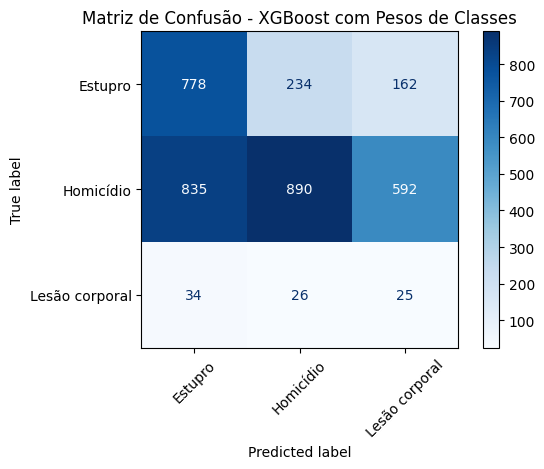


COMPARAÇÃO: Com vs Sem Pesos de Classes


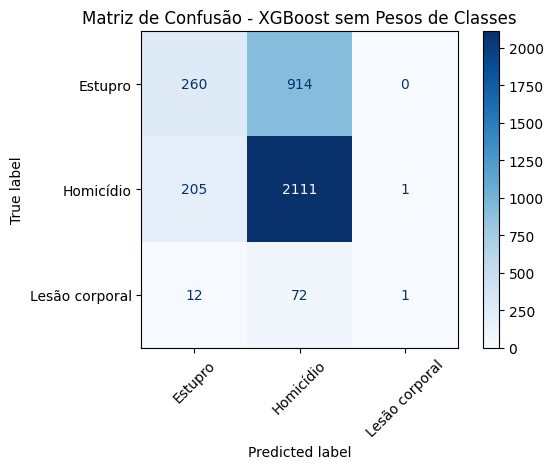

COM pesos de classes:
                precision    recall  f1-score   support

       Estupro       0.47      0.66      0.55      1174
     Homicídio       0.77      0.38      0.51      2317
Lesão corporal       0.03      0.29      0.06        85

      accuracy                           0.47      3576
     macro avg       0.43      0.45      0.37      3576
  weighted avg       0.66      0.47      0.52      3576


SEM pesos de classes:
                precision    recall  f1-score   support

       Estupro       0.55      0.22      0.31      1174
     Homicídio       0.68      0.91      0.78      2317
Lesão corporal       0.50      0.01      0.02        85

      accuracy                           0.66      3576
     macro avg       0.58      0.38      0.37      3576
  weighted avg       0.63      0.66      0.61      3576



In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

categoricas = ["SEXO_PESSOA", "COR", "DESCR_PROFISSAO", "DESCR_GRAU_INSTRUCAO", "FAIXA_ETARIA"]

# Criar copia dos dados para encoding
dados_encoded = dados[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Distribuição no treino: {np.bincount(y_train)}")
print(f"Distribuição no teste: {np.bincount(y_test)}")

# ------------------------------
# 3. CALCULAR PESOS DAS CLASSES (SUBSTITUI O SMOTE)
# ------------------------------

# Calcular pesos balanceados automaticamente
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Criar dicionário de pesos
weight_dict = {class_id: weight for class_id, weight in zip(classes, class_weights)}
print("\nPesos calculados para cada classe:")
for class_id, weight in weight_dict.items():
    class_name = le_target.inverse_transform([class_id])[0]
    print(f"Classe {class_name} (ID {class_id}): peso = {weight:.4f}")

# Calcular pesos individuais para cada amostra de treino
sample_weights = np.array([weight_dict[label] for label in y_train])

# ------------------------------
# 4. HYPERPARAMETER TUNING COM PESOS
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train), size=min(2000, len(X_train)), replace=False)
X_tune = X_train[indices]
y_tune = y_train[indices]
sample_weights_tune = sample_weights[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,
)

print("\nIniciando busca de hiperparâmetros com pesos de classes...")
# Ajustar usando os pesos no fit
random_search.fit(X_tune, y_tune, sample_weight=sample_weights_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL COM PESOS
# ------------------------------
modelo_final = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

print("Treinando modelo final com pesos de classes...")
modelo_final.fit(
    X_train,
    y_train,
    sample_weight=sample_weights  # Aplicando os pesos aqui
)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

# ------------------------------
# 7. ANÁLISE DETALHADA POR CLASSE
# ------------------------------

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost com Pesos de Classes")
plt.tight_layout()
plt.show()

# ------------------------------
# 9. COMPARAÇÃO COM MODELO SEM PESOS
# ------------------------------
print("\n" + "="*60)
print("COMPARAÇÃO: Com vs Sem Pesos de Classes")
print("="*60)

# Modelo sem pesos
modelo_sem_pesos = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
modelo_sem_pesos.fit(X_train, y_train)  # Sem sample_weight
y_pred_sem_pesos = modelo_sem_pesos.predict(X_test)

cm = confusion_matrix(y_test, y_pred_sem_pesos)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost sem Pesos de Classes")
plt.tight_layout()
plt.show()

print("COM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

print("\nSEM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred_sem_pesos)))

Top 5 Variáveis Mais Explicativas:
COR: 0.2812
SEXO_PESSOA: 0.2530
DESCR_GRAU_INSTRUCAO: 0.2056
FAIXA_ETARIA: 0.1459
DESCR_PROFISSAO: 0.1142


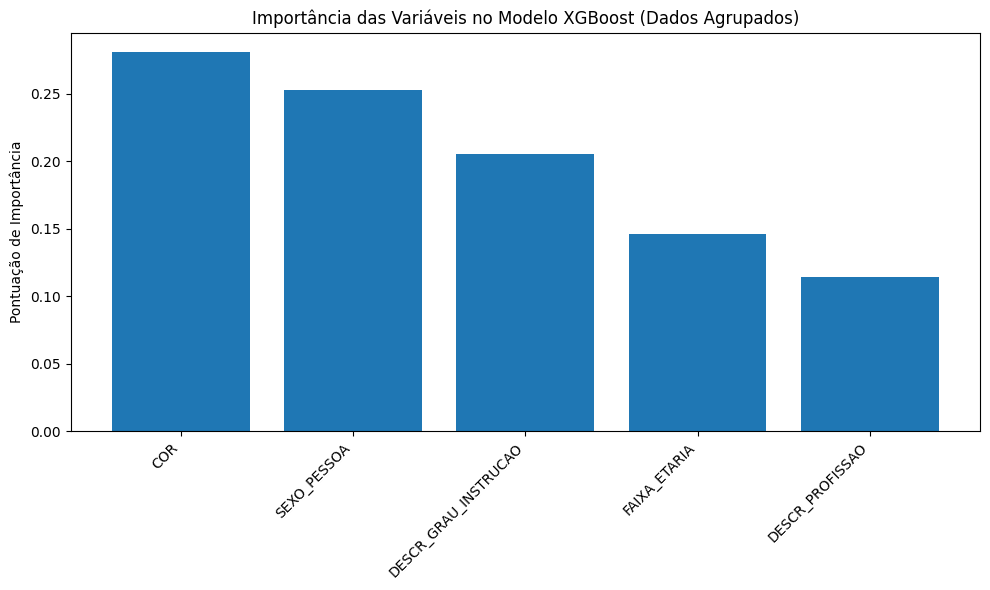

In [ ]:
# Get feature importances from the trained model
importance = modelo_final.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_names = categoricas
feature_importance_dict = dict(zip(feature_names, importance))

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the top 5 most important features
print("Top 5 Variáveis Mais Explicativas:")
for feature, score in sorted_feature_importance[:5]:
    print(f"{feature}: {score:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xticks(rotation=45, ha='right')
plt.title("Importância das Variáveis no Modelo XGBoost (Dados Agrupados)")
plt.ylabel("Pontuação de Importância")
plt.tight_layout()
plt.show()

Shape dos dados: (17876, 5)
Distribuição das classes: [ 5868 11581   427]
Aplicando SMOTE...
Tamanho antes do SMOTE: 14300
Tamanho após SMOTE: 27792
Distribuição após SMOTE: [9264 9264 9264]
Iniciando busca de hiperparâmetros...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}
Treinando modelo final...

RESULTADOS FINAIS
                precision    recall  f1-score   support

       Estupro       0.47      0.67      0.55      1174
     Homicídio       0.77      0.38      0.51      2317
Lesão corporal       0.03      0.32      0.06        85

      accuracy                           0.47      3576
     macro avg       0.43      0.45      0.37      3576
  weighted avg       0.66      0.47      0.51      3576



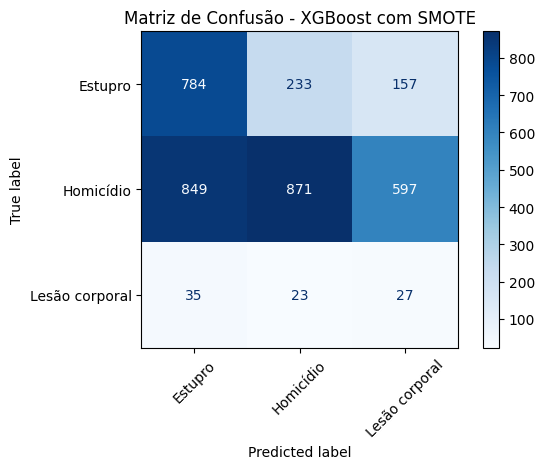

In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------
# 3. APLICAR SMOTE SEPARADAMENTE (SEM PIPELINE)
# ------------------------------

print("Aplicando SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tamanho antes do SMOTE: {X_train.shape[0]}")
print(f"Tamanho após SMOTE: {X_train_resampled.shape[0]}")
print(f"Distribuição após SMOTE: {np.bincount(y_train_resampled)}")

# ------------------------------
# 4. HYPERPARAMETER TUNING SIMPLIFICADO
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train_resampled), size=min(2000, len(X_train_resampled)), replace=False)
X_tune = X_train_resampled[indices]
y_tune = y_train_resampled[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros muito simplificada
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada simples
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,  # Muito reduzido
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,  # Reduzir para 1 para evitar problemas
)

print("Iniciando busca de hiperparâmetros...")
random_search.fit(X_tune, y_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL
# ------------------------------
modelo_final = XGBClassifier(
  **random_search.best_params_,
  eval_metric="mlogloss",
  random_state=42,
  n_jobs=-1
)

print("Treinando modelo final...")
modelo_final.fit(X_train_resampled, y_train_resampled)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

print("\n" + "="*60)
print("RESULTADOS FINAIS")
print("="*60)
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

# ------------------------------
# 7. Matriz de confusão
# ------------------------------
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost com SMOTE")
plt.tight_layout()
plt.show()


# Comparação de modelos XGBoost com e sem peso de classes e com aplicação de SMOTE para o dataset de Homicídios

Shape dos dados: (11581, 5)
Distribuição das classes: [2791 8790]
Distribuição no treino: [2233 7031]
Distribuição no teste: [ 558 1759]

Pesos calculados para cada classe:
Classe Homicídio qualificado (art. 121, §2o.) (ID 0): peso = 2.0743
Classe Homicídio simples (art. 121) (ID 1): peso = 0.6588

Iniciando busca de hiperparâmetros com pesos de classes...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.001}
Treinando modelo final com pesos de classes...


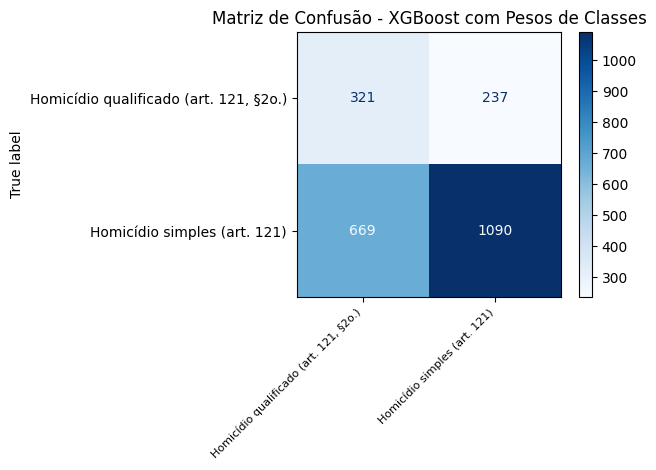


COMPARAÇÃO: Com vs Sem Pesos de Classes


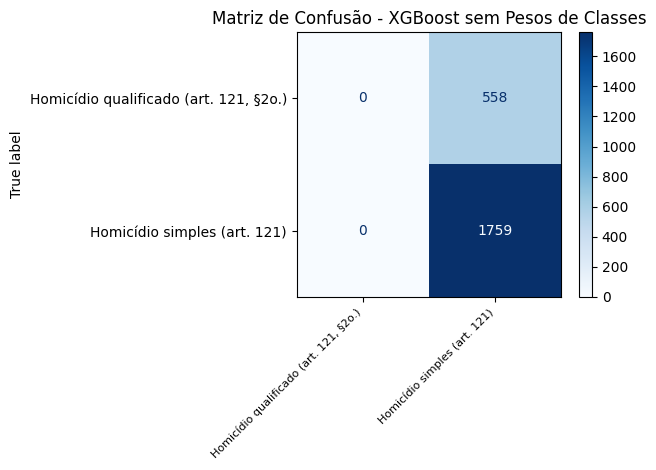

COM pesos de classes:
                                        precision    recall  f1-score   support

Homicídio qualificado (art. 121, §2o.)       0.32      0.58      0.41       558
          Homicídio simples (art. 121)       0.82      0.62      0.71      1759

                              accuracy                           0.61      2317
                             macro avg       0.57      0.60      0.56      2317
                          weighted avg       0.70      0.61      0.64      2317


SEM pesos de classes:
                                        precision    recall  f1-score   support

Homicídio qualificado (art. 121, §2o.)       0.00      0.00      0.00       558
          Homicídio simples (art. 121)       0.76      1.00      0.86      1759

                              accuracy                           0.76      2317
                             macro avg       0.38      0.50      0.43      2317
                          weighted avg       0.58      0.76      0.66 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_homicidios[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_homicidios[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_homicidios["RUBRICA"] # Fixed: Changed from dados to dados_homicidios
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Distribuição no treino: {np.bincount(y_train)}")
print(f"Distribuição no teste: {np.bincount(y_test)}")

# ------------------------------
# 3. CALCULAR PESOS DAS CLASSES (SUBSTITUI O SMOTE)
# ------------------------------

# Calcular pesos balanceados automaticamente
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Criar dicionário de pesos
weight_dict = {class_id: weight for class_id, weight in zip(classes, class_weights)}
print("\nPesos calculados para cada classe:")
for class_id, weight in weight_dict.items():
    class_name = le_target.inverse_transform([class_id])[0]
    print(f"Classe {class_name} (ID {class_id}): peso = {weight:.4f}")

# Calcular pesos individuais para cada amostra de treino
sample_weights = np.array([weight_dict[label] for label in y_train])

# ------------------------------
# 4. HYPERPARAMETER TUNING COM PESOS
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train), size=min(2000, len(X_train)), replace=False)
X_tune = X_train[indices]
y_tune = y_train[indices]
sample_weights_tune = sample_weights[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,
)

print("\nIniciando busca de hiperparâmetros com pesos de classes...")
# Ajustar usando os pesos no fit
random_search.fit(X_tune, y_tune, sample_weight=sample_weights_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL COM PESOS
# ------------------------------
modelo_final = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

print("Treinando modelo final com pesos de classes...")
modelo_final.fit(
    X_train,
    y_train,
    sample_weight=sample_weights  # Aplicando os pesos aqui
)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

# ------------------------------
# 7. ANÁLISE DETALHADA POR CLASSE
# ------------------------------

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate and resize x-axis labels
plt.xlabel(None) # Remove x-axis label
plt.title("Matriz de Confusão - XGBoost com Pesos de Classes")
plt.tight_layout()
plt.show()

# ------------------------------
# 9. COMPARAÇÃO COM MODELO SEM PESOS
# ------------------------------
print("\n" + "="*60)
print("COMPARAÇÃO: Com vs Sem Pesos de Classes")
print("="*60)

# Modelo sem pesos
modelo_sem_pesos = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
modelo_sem_pesos.fit(X_train, y_train)  # Sem sample_weight
y_pred_sem_pesos = modelo_sem_pesos.predict(X_test)

# Matriz de confusão sem pesos
cm_sem_pesos = confusion_matrix(y_test, y_pred_sem_pesos)
disp_sem_pesos = ConfusionMatrixDisplay(confusion_matrix=cm_sem_pesos,
                             display_labels=le_target.classes_)
disp_sem_pesos.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate and resize x-axis labels
plt.xlabel(None) # Remove x-axis label
plt.title("Matriz de Confusão - XGBoost sem Pesos de Classes")
plt.tight_layout()
plt.show()


print("COM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

print("\nSEM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred_sem_pesos)))

Top 5 Variáveis Mais Explicativas:
DESCR_GRAU_INSTRUCAO: 0.2898
COR: 0.1946
SEXO_PESSOA: 0.1863
FAIXA_ETARIA: 0.1703
DESCR_PROFISSAO: 0.1589


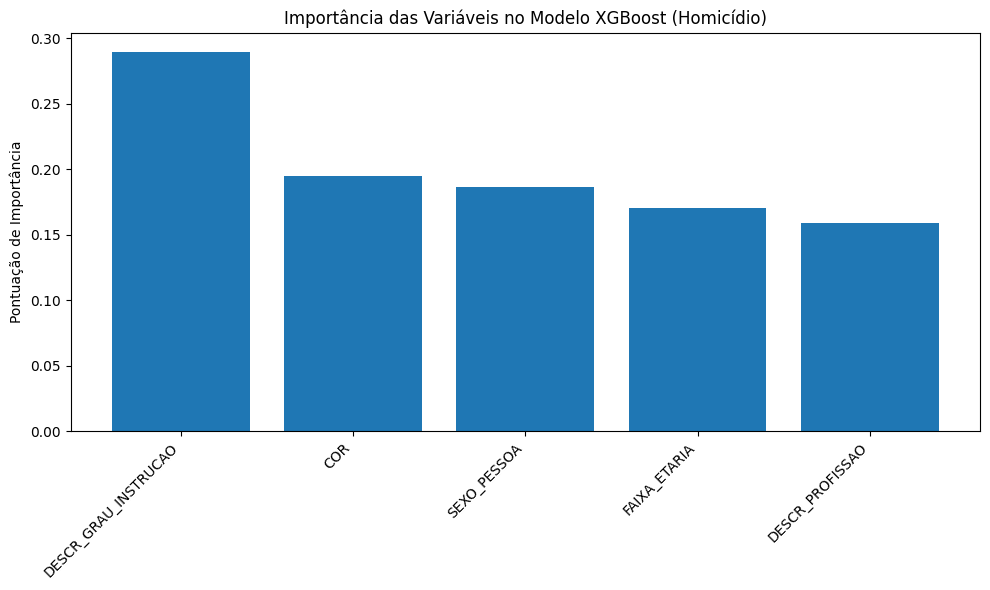

In [ ]:
# Get feature importances from the trained model
importance = modelo_final.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_names = categoricas
feature_importance_dict = dict(zip(feature_names, importance))

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the top 5 most important features
print("Top 5 Variáveis Mais Explicativas:")
for feature, score in sorted_feature_importance[:5]:
    print(f"{feature}: {score:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xticks(rotation=45, ha='right')
plt.title("Importância das Variáveis no Modelo XGBoost (Homicídio)")
plt.ylabel("Pontuação de Importância")
plt.tight_layout()
plt.show()

Shape dos dados: (11581, 5)
Distribuição das classes: [2791 8790]
Aplicando SMOTE...
Tamanho antes do SMOTE: 9264
Tamanho após SMOTE: 14062
Distribuição após SMOTE: [7031 7031]
Iniciando busca de hiperparâmetros...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.2}
Treinando modelo final...

RESULTADOS FINAIS
                                        precision    recall  f1-score   support

Homicídio qualificado (art. 121, §2o.)       0.33      0.40      0.36       558
          Homicídio simples (art. 121)       0.80      0.75      0.77      1759

                              accuracy                           0.66      2317
                             macro avg       0.56      0.57      0.57      2317
                          weighted avg       0.68      0.66      0.67      2317



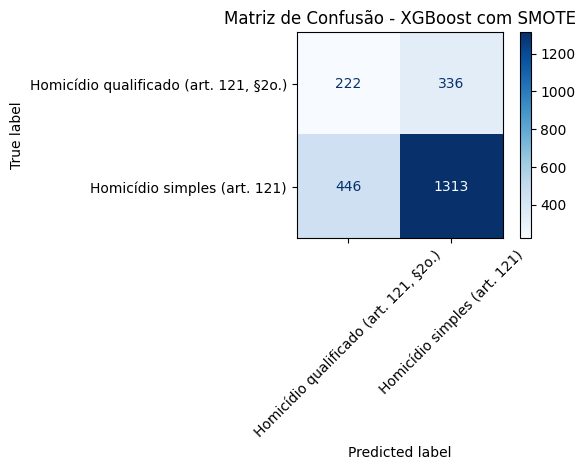

In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_homicidios[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_homicidios[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_homicidios["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------
# 3. APLICAR SMOTE SEPARADAMENTE (SEM PIPELINE)
# ------------------------------

print("Aplicando SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tamanho antes do SMOTE: {X_train.shape[0]}")
print(f"Tamanho após SMOTE: {X_train_resampled.shape[0]}")
print(f"Distribuição após SMOTE: {np.bincount(y_train_resampled)}")

# ------------------------------
# 4. HYPERPARAMETER TUNING SIMPLIFICADO
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train_resampled), size=min(2000, len(X_train_resampled)), replace=False)
X_tune = X_train_resampled[indices]
y_tune = y_train_resampled[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros muito simplificada
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada simples
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,  # Muito reduzido
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,  # Reduzir para 1 para evitar problemas
)

print("Iniciando busca de hiperparâmetros...")
random_search.fit(X_tune, y_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL
# ------------------------------
modelo_final = XGBClassifier(
  **random_search.best_params_,
  eval_metric="mlogloss",
  random_state=42,
  n_jobs=-1
)

print("Treinando modelo final...")
modelo_final.fit(X_train_resampled, y_train_resampled)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

print("\n" + "="*60)
print("RESULTADOS FINAIS")
print("="*60)
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

# ------------------------------
# 7. Matriz de confusão
# ------------------------------
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost com SMOTE")
plt.tight_layout()
plt.show()

# Comparação de modelos XGBoost com e sem peso de classes e com aplicação de SMOTE para o dataset de Estupro

Shape dos dados: (5868, 5)
Distribuição das classes: [4008 1860]
Distribuição no treino: [3206 1488]
Distribuição no teste: [802 372]

Pesos calculados para cada classe:
Classe Estupro (art.213) (ID 0): peso = 0.7321
Classe Estupro de vulneravel (art.217-A) (ID 1): peso = 1.5773

Iniciando busca de hiperparâmetros com pesos de classes...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 1.5, 'reg_alpha': 5, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}
Treinando modelo final com pesos de classes...


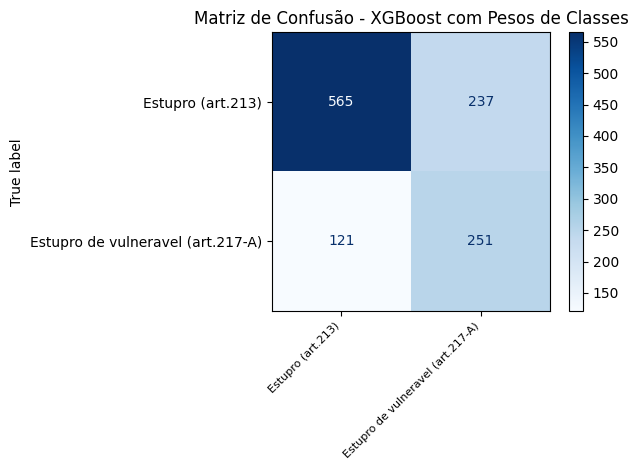

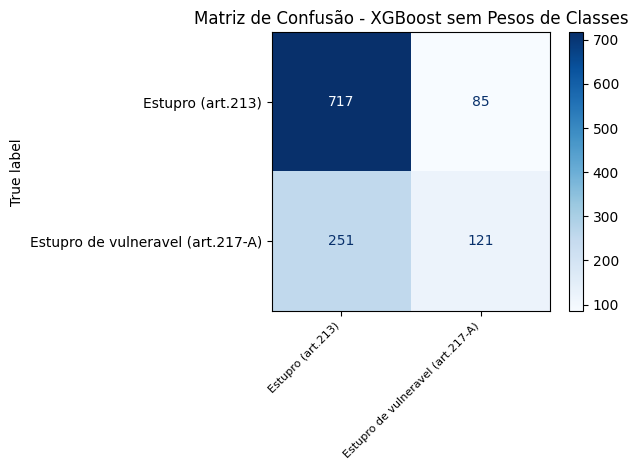


COMPARAÇÃO: Com vs Sem Pesos de Classes
COM pesos de classes:
                                   precision    recall  f1-score   support

                Estupro (art.213)       0.82      0.70      0.76       802
Estupro de vulneravel (art.217-A)       0.51      0.67      0.58       372

                         accuracy                           0.70      1174
                        macro avg       0.67      0.69      0.67      1174
                     weighted avg       0.73      0.70      0.70      1174


SEM pesos de classes:
                                   precision    recall  f1-score   support

                Estupro (art.213)       0.74      0.89      0.81       802
Estupro de vulneravel (art.217-A)       0.59      0.33      0.42       372

                         accuracy                           0.71      1174
                        macro avg       0.66      0.61      0.61      1174
                     weighted avg       0.69      0.71      0.69      1174



In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_estupros[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_estupros[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_estupros["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Distribuição no treino: {np.bincount(y_train)}")
print(f"Distribuição no teste: {np.bincount(y_test)}")

# ------------------------------
# 3. CALCULAR PESOS DAS CLASSES (SUBSTITUI O SMOTE)
# ------------------------------

# Calcular pesos balanceados automaticamente
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Criar dicionário de pesos
weight_dict = {class_id: weight for class_id, weight in zip(classes, class_weights)}
print("\nPesos calculados para cada classe:")
for class_id, weight in weight_dict.items():
    class_name = le_target.inverse_transform([class_id])[0]
    print(f"Classe {class_name} (ID {class_id}): peso = {weight:.4f}")

# Calcular pesos individuais para cada amostra de treino
sample_weights = np.array([weight_dict[label] for label in y_train])

# ------------------------------
# 4. HYPERPARAMETER TUNING COM PESOS
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train), size=min(2000, len(X_train)), replace=False)
X_tune = X_train[indices]
y_tune = y_train[indices]
sample_weights_tune = sample_weights[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,
)

print("\nIniciando busca de hiperparâmetros com pesos de classes...")
# Ajustar usando os pesos no fit
random_search.fit(X_tune, y_tune, sample_weight=sample_weights_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL COM PESOS
# ------------------------------
modelo_final = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

print("Treinando modelo final com pesos de classes...")
modelo_final.fit(
    X_train,
    y_train,
    sample_weight=sample_weights  # Aplicando os pesos aqui
)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

# ------------------------------
# 7. ANÁLISE DETALHADA POR CLASSE
# ------------------------------

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate and resize x-axis labels
plt.xlabel(None) # Remove x-axis label
plt.title("Matriz de Confusão - XGBoost com Pesos de Classes")
plt.tight_layout()
plt.show()

# Modelo sem pesos
modelo_sem_pesos = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
modelo_sem_pesos.fit(X_train, y_train)  # Sem sample_weight
y_pred_sem_pesos = modelo_sem_pesos.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_sem_pesos)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate and resize x-axis labels
plt.xlabel(None) # Remove x-axis label
plt.title("Matriz de Confusão - XGBoost sem Pesos de Classes")
plt.tight_layout()
plt.show()

# ------------------------------
# 9. COMPARAÇÃO COM MODELO SEM PESOS
# ------------------------------
print("\n" + "="*60)
print("COMPARAÇÃO: Com vs Sem Pesos de Classes")
print("="*60)

print("COM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

print("\nSEM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred_sem_pesos)))

Top 5 Variáveis Mais Explicativas:
DESCR_PROFISSAO: 0.5328
DESCR_GRAU_INSTRUCAO: 0.3158
FAIXA_ETARIA: 0.0932
SEXO_PESSOA: 0.0333
COR: 0.0248


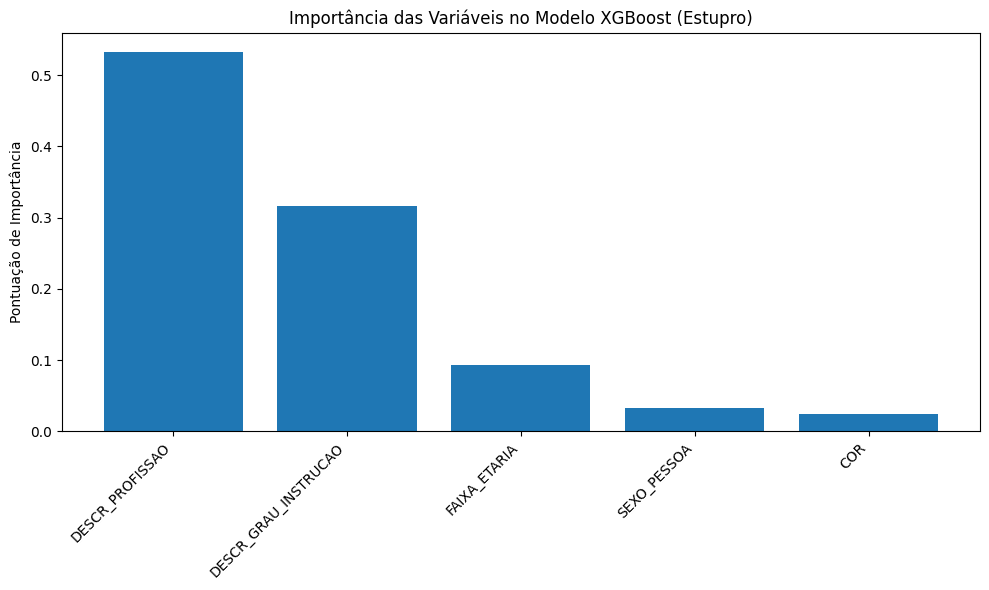

In [ ]:
# Get feature importances from the trained model
importance = modelo_final.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_names = categoricas
feature_importance_dict = dict(zip(feature_names, importance))

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the top 5 most important features
print("Top 5 Variáveis Mais Explicativas:")
for feature, score in sorted_feature_importance[:5]:
    print(f"{feature}: {score:.4f}")

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xticks(rotation=45, ha='right')
plt.title("Importância das Variáveis no Modelo XGBoost (Estupro)")
plt.ylabel("Pontuação de Importância")
plt.tight_layout()
plt.show()

Shape dos dados: (5868, 5)
Distribuição das classes: [4008 1860]
Aplicando SMOTE...
Tamanho antes do SMOTE: 4694
Tamanho após SMOTE: 6412
Distribuição após SMOTE: [3206 3206]
Iniciando busca de hiperparâmetros...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 3, 'reg_alpha': 5, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.3}
Treinando modelo final...


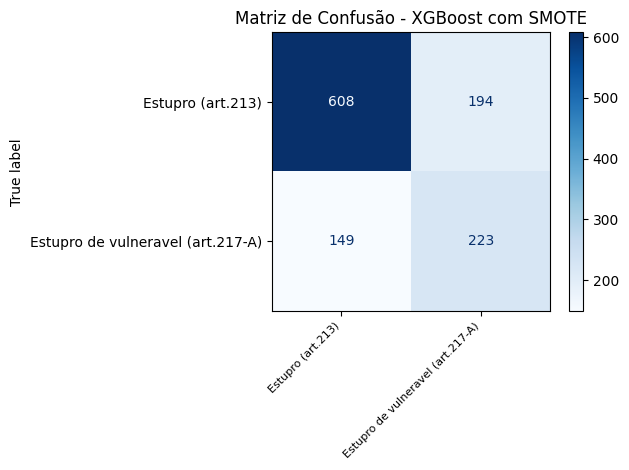


RESULTADOS FINAIS
                                   precision    recall  f1-score   support

                Estupro (art.213)       0.80      0.76      0.78       802
Estupro de vulneravel (art.217-A)       0.53      0.60      0.57       372

                         accuracy                           0.71      1174
                        macro avg       0.67      0.68      0.67      1174
                     weighted avg       0.72      0.71      0.71      1174



In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_estupros[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_estupros[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_estupros["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------
# 3. APLICAR SMOTE SEPARADAMENTE (SEM PIPELINE)
# ------------------------------

print("Aplicando SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tamanho antes do SMOTE: {X_train.shape[0]}")
print(f"Tamanho após SMOTE: {X_train_resampled.shape[0]}")
print(f"Distribuição após SMOTE: {np.bincount(y_train_resampled)}")

# ------------------------------
# 4. HYPERPARAMETER TUNING SIMPLIFICADO
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train_resampled), size=min(2000, len(X_train_resampled)), replace=False)
X_tune = X_train_resampled[indices]
y_tune = y_train_resampled[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros muito simplificada
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada simples
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,  # Muito reduzido
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,  # Reduzir para 1 para evitar problemas
)

print("Iniciando busca de hiperparâmetros...")
random_search.fit(X_tune, y_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL
# ------------------------------
modelo_final = XGBClassifier(
  **random_search.best_params_,
  eval_metric="mlogloss",
  random_state=42,
  n_jobs=-1
)

print("Treinando modelo final...")
modelo_final.fit(X_train_resampled, y_train_resampled)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate and resize x-axis labels
plt.xlabel(None) # Remove x-axis label
plt.title("Matriz de Confusão - XGBoost com SMOTE")
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("RESULTADOS FINAIS")
print("="*60)
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))


# Comparação de modelos XGBoost com e sem peso de classes e com aplicação de SMOTE para o dataset de Lesões Corporais

Shape dos dados: (427, 5)
Distribuição das classes: [ 50 344  33]
Distribuição no treino: [ 40 275  26]
Distribuição no teste: [10 69  7]

Pesos calculados para cada classe:
Classe Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.) (ID 0): peso = 2.8417
Classe Lesão corporal de natureza GRAVE (art. 129, §1o.) (ID 1): peso = 0.4133
Classe Lesão corporal seguida de morte (art. 129, §3o.) (ID 2): peso = 4.3718

Iniciando busca de hiperparâmetros com pesos de classes...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.2}
Treinando modelo final com pesos de classes...


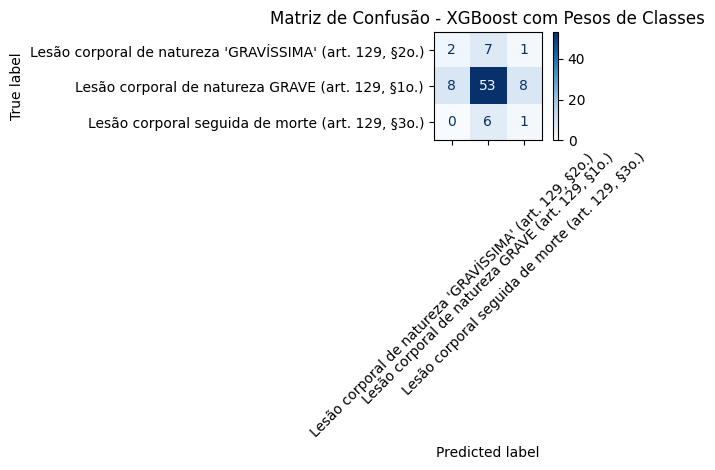

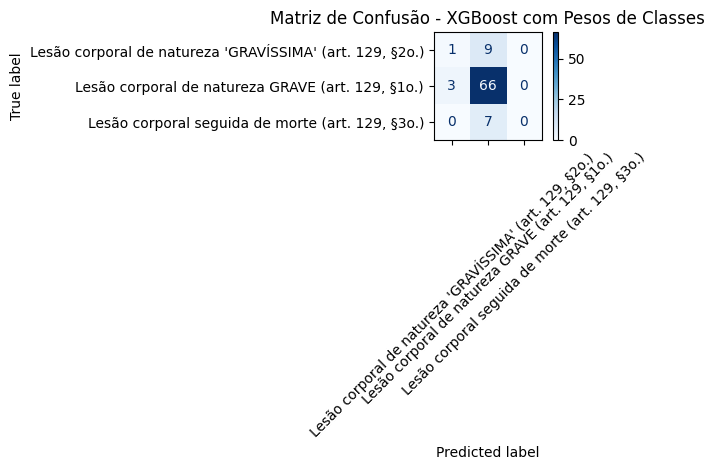


COMPARAÇÃO: Com vs Sem Pesos de Classes
COM pesos de classes:
                                                          precision    recall  f1-score   support

Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)       0.20      0.20      0.20        10
       Lesão corporal de natureza GRAVE (art. 129, §1o.)       0.80      0.77      0.79        69
        Lesão corporal seguida de morte (art. 129, §3o.)       0.10      0.14      0.12         7

                                                accuracy                           0.65        86
                                               macro avg       0.37      0.37      0.37        86
                                            weighted avg       0.68      0.65      0.66        86


SEM pesos de classes:
                                                          precision    recall  f1-score   support

Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)       0.25      0.10      0.14        10
       Lesão corporal de nat

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_lesoes[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_lesoes[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_lesoes["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Distribuição no treino: {np.bincount(y_train)}")
print(f"Distribuição no teste: {np.bincount(y_test)}")

# ------------------------------
# 3. CALCULAR PESOS DAS CLASSES (SUBSTITUI O SMOTE)
# ------------------------------

# Calcular pesos balanceados automaticamente
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Criar dicionário de pesos
weight_dict = {class_id: weight for class_id, weight in zip(classes, class_weights)}
print("\nPesos calculados para cada classe:")
for class_id, weight in weight_dict.items():
    class_name = le_target.inverse_transform([class_id])[0]
    print(f"Classe {class_name} (ID {class_id}): peso = {weight:.4f}")

# Calcular pesos individuais para cada amostra de treino
sample_weights = np.array([weight_dict[label] for label in y_train])

# ------------------------------
# 4. HYPERPARAMETER TUNING COM PESOS
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train), size=min(2000, len(X_train)), replace=False)
X_tune = X_train[indices]
y_tune = y_train[indices]
sample_weights_tune = sample_weights[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,
)

print("\nIniciando busca de hiperparâmetros com pesos de classes...")
# Ajustar usando os pesos no fit
random_search.fit(X_tune, y_tune, sample_weight=sample_weights_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL COM PESOS
# ------------------------------
modelo_final = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

print("Treinando modelo final com pesos de classes...")
modelo_final.fit(
    X_train,
    y_train,
    sample_weight=sample_weights  # Aplicando os pesos aqui
)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

# ------------------------------
# 7. ANÁLISE DETALHADA POR CLASSE
# ------------------------------

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost com Pesos de Classes")
plt.tight_layout()
plt.show()

# Modelo sem pesos
modelo_sem_pesos = XGBClassifier(
    **random_search.best_params_,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
modelo_sem_pesos.fit(X_train, y_train)  # Sem sample_weight
y_pred_sem_pesos = modelo_sem_pesos.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_sem_pesos)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title("Matriz de Confusão - XGBoost com Pesos de Classes")
plt.tight_layout()
plt.show()

# ------------------------------
# 9. COMPARAÇÃO COM MODELO SEM PESOS
# ------------------------------
print("\n" + "="*60)
print("COMPARAÇÃO: Com vs Sem Pesos de Classes")
print("="*60)

print("COM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

print("\nSEM pesos de classes:")
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred_sem_pesos)))

In [ ]:
# ------------------------------
# 1. PREPARAÇÃO DOS DADOS
# ------------------------------

# Criar copia dos dados para encoding
dados_encoded = dados_lesoes[categoricas].copy()

# Aplicar Label Encoding a cada variável categórica
label_encoders = {}
for coluna in categoricas:
    le = LabelEncoder()
    dados_encoded[coluna] = le.fit_transform(dados_lesoes[coluna].astype(str))
    label_encoders[coluna] = le

# Variáveis features
X = dados_encoded.values

# Variável alvo (crimes)
y = dados_lesoes["RUBRICA"]
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Shape dos dados: {X.shape}")
print(f"Distribuição das classes: {np.bincount(y_encoded)}")

# ------------------------------
# 2. DIVISÃO TREINO/TESTE
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ------------------------------
# 3. APLICAR SMOTE SEPARADAMENTE (SEM PIPELINE)
# ------------------------------

print("Aplicando SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Tamanho antes do SMOTE: {X_train.shape[0]}")
print(f"Tamanho após SMOTE: {X_train_resampled.shape[0]}")
print(f"Distribuição após SMOTE: {np.bincount(y_train_resampled)}")

# ------------------------------
# 4. HYPERPARAMETER TUNING SIMPLIFICADO
# ------------------------------

# Usar subconjunto menor para tuning rápido
indices = np.random.choice(len(X_train_resampled), size=min(2000, len(X_train_resampled)), replace=False)
X_tune = X_train_resampled[indices]
y_tune = y_train_resampled[indices]

# Modelo base
modelo_base = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Grade de parâmetros muito simplificada
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0.5, 1, 1.5, 2, 3, 5]
}

scorer = make_scorer(f1_score, average='weighted')

# Validação cruzada simples
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=8,  # Muito reduzido
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1,  # Reduzir para 1 para evitar problemas
)

print("Iniciando busca de hiperparâmetros...")
random_search.fit(X_tune, y_tune)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# ------------------------------
# 5. TREINAR MODELO FINAL
# ------------------------------
modelo_final = XGBClassifier(
  **random_search.best_params_,
  eval_metric="mlogloss",
  random_state=42,
  n_jobs=-1
)

print("Treinando modelo final...")
modelo_final.fit(X_train_resampled, y_train_resampled)

# ------------------------------
# 6. AVALIAÇÃO
# ------------------------------
y_pred = modelo_final.predict(X_test)

print("\n" + "="*60)
print("RESULTADOS FINAIS")
print("="*60)
print(classification_report(le_target.inverse_transform(y_test),
                          le_target.inverse_transform(y_pred)))

Shape dos dados: (427, 5)
Distribuição das classes: [ 50 344  33]
Aplicando SMOTE...
Tamanho antes do SMOTE: 341
Tamanho após SMOTE: 825
Distribuição após SMOTE: [275 275 275]
Iniciando busca de hiperparâmetros...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Melhores parâmetros encontrados:
{'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.2}
Treinando modelo final...

RESULTADOS FINAIS
                                                          precision    recall  f1-score   support

Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)       0.27      0.30      0.29        10
       Lesão corporal de natureza GRAVE (art. 129, §1o.)       0.84      0.70      0.76        69
        Lesão corporal seguida de morte (art. 129, §3o.)       0.11      0.29      0.16         7

                                                accuracy                           0.62        86
                                               macro avg     

#